<a href="https://colab.research.google.com/github/VarshaSriVattikonda/Ml/blob/main/Adultincomeclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import cufflinks as cf
%matplotlib inline

from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import PowerTransformer, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import PrecisionRecallDisplay, roc_curve, average_precision_score, precision_recall_curve
from sklearn.metrics import RocCurveDisplay, roc_auc_score, auc
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


from yellowbrick.regressor import ResidualsPlot, PredictionError

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/adult.csv")

In [ ]:
df.shape

(32561, 15)

In [ ]:
df.head().T

0                1              2  \
age                        90               82             66   
workclass                   ?          Private              ?   
fnlwgt                  77053           132870         186061   
education             HS-grad          HS-grad   Some-college   
education.num               9                9             10   
marital.status        Widowed          Widowed        Widowed   
occupation                  ?  Exec-managerial              ?   
relationship    Not-in-family    Not-in-family      Unmarried   
race                    White            White          Black   
sex                    Female           Female         Female   
capital.gain                0                0              0   
capital.loss             4356             4356           4356   
hours.per.week             40               18             40   
native.country  United-States    United-States  United-States   
income                  <=50K            <=50K          <=50K   

                                3               4  
age                            54              41  
workclass                 Private         Private  
fnlwgt                     140359          264663  
education                 7th-8th    Some-college  
education.num                   4              10  
marital.status           Divorced       Separated  
occupation      Machine-op-inspct  Prof-specialty  
relationship            Unmarried       Own-child  
race                        White           White  
sex                        Female          Female  
capital.gain                    0               0  
capital.loss                 3900            3900  
hours.per.week                 40              40  
native.country      United-States   United-States  
income                      <=50K           <=50K

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.describe()

age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [ ]:
df.describe(include= 'object').T

count unique                 top   freq
workclass       32561      9             Private  22696
education       32561     16             HS-grad  10501
marital.status  32561      7  Married-civ-spouse  14976
occupation      32561     15      Prof-specialty   4140
relationship    32561      6             Husband  13193
race            32561      5               White  27816
sex             32561      2                Male  21790
native.country  32561     42       United-States  29170
income          32561      2               <=50K  24720

In [ ]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

summary(df)

Data shape: (32561, 15)
___________________________
Data Types:
Types
object    9
int64     6
Name: count, dtype: int64
___________________________


Types  Counts  Uniques  Nulls                 Min  \
age              int64   32561       73      0                  17   
capital.gain     int64   32561      119      0                   0   
capital.loss     int64   32561       92      0                   0   
education       object   32561       16      0                10th   
education.num    int64   32561       16      0                   1   
fnlwgt           int64   32561    21648      0               12285   
hours.per.week   int64   32561       94      0                   1   
income          object   32561        2      0               <=50K   
marital.status  object   32561        7      0            Divorced   
native.country  object   32561       42      0                   ?   
occupation      object   32561       15      0                   ?   
race            object   32561        5      0  Amer-Indian-Eskimo   
relationship    object   32561        6      0             Husband   
sex             object   32561        2      0              Female   
workclass       object   32561        9      0                   ?   

                             Max  
age                           90  
capital.gain               99999  
capital.loss                4356  
education           Some-college  
education.num                 16  
fnlwgt                   1484705  
hours.per.week                99  
income                      >50K  
marital.status           Widowed  
native.country        Yugoslavia  
occupation      Transport-moving  
race                       White  
relationship                Wife  
sex                         Male  
workclass            Without-pay

In [ ]:
df.duplicated().sum()

24

In [ ]:
def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")

duplicate_values(df)

Duplicate check...
There are 24 duplicated observations in the dataset.
24 duplicates were dropped!
No more duplicate rows!


In [ ]:
def get_unique_values(df):
    output_data = []
    for col in df.columns:
        # Check if the column has more than 10 unique values
        if df.loc[:, col].nunique() <= 10:
            # Get the unique values in the column
            unique_values = df.loc[:, col].unique()
            # Append the column name, number of unique values, unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
        else:
            # Otherwise, append only the column name, number of unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])

    output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

    return output_df

In [ ]:
get_unique_values(df)

Column Name  Number of Unique Values  \
0              age                       73   
1        workclass                        9   
2           fnlwgt                    21648   
3        education                       16   
4    education.num                       16   
5   marital.status                        7   
6       occupation                       15   
7     relationship                        6   
8             race                        5   
9              sex                        2   
10    capital.gain                      119   
11    capital.loss                       92   
12  hours.per.week                       94   
13  native.country                       42   
14          income                        2   

                                       Unique Values  Data Type  
0                                                   -     int64  
1   [?, Private, State-gov, Federal-gov, Self-emp-...    object  
2                                                   -     int64  
3                                                   -    object  
4                                                   -     int64  
5   [Widowed, Divorced, Separated, Never-married, ...    object  
6                                                   -    object  
7   [Not-in-family, Unmarried, Own-child, Other-re...    object  
8   [White, Black, Asian-Pac-Islander, Other, Amer...    object  
9                                      [Female, Male]    object  
10                                                  -     int64  
11                                                  -     int64  
12                                                  -     int64  
13                                                  -    object  
14                                      [<=50K, >50K]    object

In [ ]:
get_unique_values(df)

Column Name  Number of Unique Values  \
0              age                       73   
1        workclass                        9   
2           fnlwgt                    21648   
3        education                       16   
4    education.num                       16   
5   marital.status                        7   
6       occupation                       15   
7     relationship                        6   
8             race                        5   
9              sex                        2   
10    capital.gain                      119   
11    capital.loss                       92   
12  hours.per.week                       94   
13  native.country                       42   
14          income                        2   

                                       Unique Values  Data Type  
0                                                   -     int64  
1   [?, Private, State-gov, Federal-gov, Self-emp-...    object  
2                                                   -     int64  
3                                                   -    object  
4                                                   -     int64  
5   [Widowed, Divorced, Separated, Never-married, ...    object  
6                                                   -    object  
7   [Not-in-family, Unmarried, Own-child, Other-re...    object  
8   [White, Black, Asian-Pac-Islander, Other, Amer...    object  
9                                      [Female, Male]    object  
10                                                  -     int64  
11                                                  -     int64  
12                                                  -     int64  
13                                                  -    object  
14                                      [<=50K, >50K]    object

In [ ]:
def missing_values(df):

    missing_count = df.isnull().sum()
    value_count = df.isnull().count()
    missing_percentage = round(missing_count / value_count * 100, 2)
    missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
    return missing_df

missing_values(df)

count  percentage
age                 0         0.0
workclass           0         0.0
fnlwgt              0         0.0
education           0         0.0
education.num       0         0.0
marital.status      0         0.0
occupation          0         0.0
relationship        0         0.0
race                0         0.0
sex                 0         0.0
capital.gain        0         0.0
capital.loss        0         0.0
hours.per.week      0         0.0
native.country      0         0.0
income              0         0.0

In [ ]:
df[df == '?'] = np.nan

In [ ]:
missing_values(df)

count  percentage
age                 0        0.00
workclass        1836        5.64
fnlwgt              0        0.00
education           0        0.00
education.num       0        0.00
marital.status      0        0.00
occupation       1843        5.66
relationship        0        0.00
race                0        0.00
sex                 0        0.00
capital.gain        0        0.00
capital.loss        0        0.00
hours.per.week      0        0.00
native.country    582        1.79
income              0        0.00

In [ ]:
df['workclass'].value_counts(normalize=True)

workclass
Private             0.738510
Self-emp-not-inc    0.082733
Local-gov           0.068174
State-gov           0.042279
Self-emp-inc        0.036351
Federal-gov         0.031269
Without-pay         0.000456
Never-worked        0.000228
Name: proportion, dtype: float64

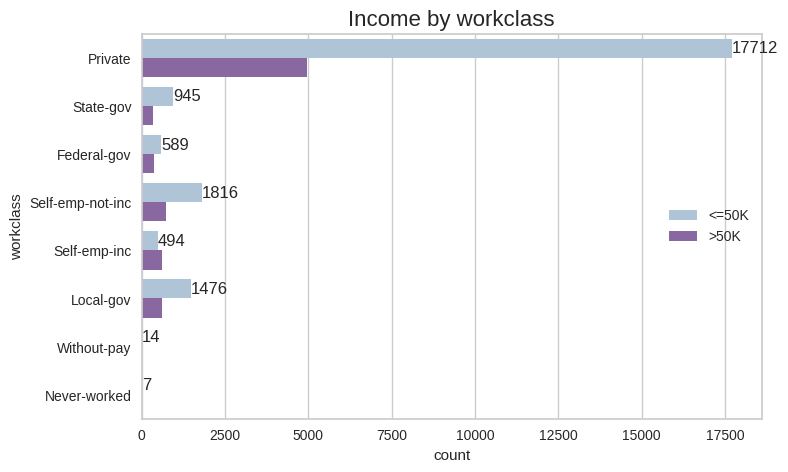

In [ ]:
plt.figure(figsize = (8,5))
ax = sns.countplot(y = df['workclass'], hue = df['income'] , palette='BuPu')
plt.title("Income by workclass", fontsize = 16)
ax.bar_label(ax.containers[0]);
ax.legend(loc='center right')

In [ ]:
df['workclass'] = df['workclass'].fillna('Private')

In [ ]:
missing_values(df)

count  percentage
age                 0        0.00
workclass           0        0.00
fnlwgt              0        0.00
education           0        0.00
education.num       0        0.00
marital.status      0        0.00
occupation       1843        5.66
relationship        0        0.00
race                0        0.00
sex                 0        0.00
capital.gain        0        0.00
capital.loss        0        0.00
hours.per.week      0        0.00
native.country    582        1.79
income              0        0.00

In [ ]:
df['occupation'].value_counts(normalize=True)

occupation
Prof-specialty       0.134749
Craft-repair         0.133381
Exec-managerial      0.132436
Adm-clerical         0.122760
Sales                0.118916
Other-service        0.107220
Machine-op-inspct    0.065159
Transport-moving     0.052030
Handlers-cleaners    0.044602
Farming-fishing      0.032319
Tech-support         0.030201
Protective-serv      0.021144
Priv-house-serv      0.004789
Armed-Forces         0.000293
Name: proportion, dtype: float64

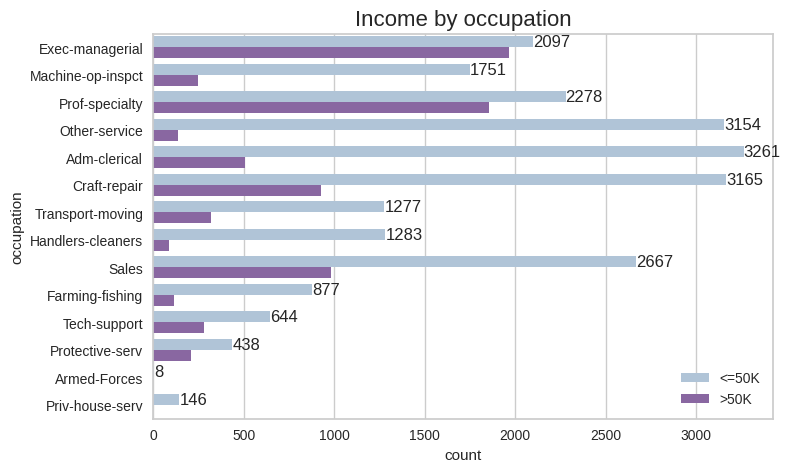

In [ ]:
plt.figure(figsize = (8,5))
ax = sns.countplot(y = df['occupation'], hue = df['income'], palette='BuPu')
plt.title("Income by occupation", fontsize = 16)
ax.bar_label(ax.containers[0])
ax.legend(loc='lower right')
plt.show()

In [ ]:
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])

In [ ]:
missing_values(df)

count  percentage
age                 0        0.00
workclass           0        0.00
fnlwgt              0        0.00
education           0        0.00
education.num       0        0.00
marital.status      0        0.00
occupation          0        0.00
relationship        0        0.00
race                0        0.00
sex                 0        0.00
capital.gain        0        0.00
capital.loss        0        0.00
hours.per.week      0        0.00
native.country    582        1.79
income              0        0.00

In [ ]:
df['native.country'].value_counts(normalize=True)

native.country
United-States                 0.912314
Mexico                        0.019997
Philippines                   0.006196
Germany                       0.004287
Canada                        0.003787
Puerto-Rico                   0.003568
El-Salvador                   0.003317
India                         0.003129
Cuba                          0.002973
England                       0.002816
Jamaica                       0.002535
South                         0.002504
China                         0.002347
Italy                         0.002284
Dominican-Republic            0.002191
Vietnam                       0.002097
Guatemala                     0.001940
Japan                         0.001940
Poland                        0.001878
Columbia                      0.001846
Taiwan                        0.001596
Haiti                         0.001377
Iran                          0.001346
Portugal                      0.001158
Nicaragua                     0.001064
Peru                          0.000970
Greece                        0.000908
France                        0.000908
Ecuador                       0.000876
Ireland                       0.000751
Hong                          0.000626
Trinadad&Tobago               0.000595
Cambodia                      0.000595
Thailand                      0.000563
Laos                          0.000563
Yugoslavia                    0.000501
Outlying-US(Guam-USVI-etc)    0.000438
Hungary                       0.000407
Honduras                      0.000407
Scotland                      0.000376
Holand-Netherlands            0.000031
Name: proportion, dtype: float64

In [ ]:
df['native.country'].mode()[0]

'United-States'

In [ ]:
df['native.country'] = df['native.country'].fillna('United-States')

In [ ]:
missing_values(df)

count  percentage
age                 0         0.0
workclass           0         0.0
fnlwgt              0         0.0
education           0         0.0
education.num       0         0.0
marital.status      0         0.0
occupation          0         0.0
relationship        0         0.0
race                0         0.0
sex                 0         0.0
capital.gain        0         0.0
capital.loss        0         0.0
hours.per.week      0         0.0
native.country      0         0.0
income              0         0.0

In [ ]:
def value_cnt_fonc(df, column_name):
    vc = df[column_name].value_counts()
    vc_norm = df[column_name].value_counts(normalize=True)

    vc = vc.rename_axis(column_name).reset_index(name='counts')
    vc_norm = vc_norm.rename_axis(column_name).reset_index(name='norm_counts')

    df_result = pd.concat([vc[column_name], vc['counts'], vc_norm['norm_counts']], axis=1)

    return df_result

In [ ]:
cat_features = df.select_dtypes(include='object').columns
num_features = df.select_dtypes(include=['int64','float64']).columns

print('Categoricals:', list(cat_features))
print('---------------------------')
print('Numericals:',list(num_features))

Categoricals: ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']
---------------------------
Numericals: ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']


In [ ]:
value_cnt_fonc(df, 'income')

income  counts  norm_counts
0  <=50K   24698     0.759074
1   >50K    7839     0.240926

In [ ]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

In [ ]:
df.sample(3)

age workclass  fnlwgt  education  education.num      marital.status  \
5183    68   Private  140282    7th-8th              4  Married-civ-spouse   
3529    36   Private  115360       10th              6  Married-civ-spouse   
27914   30   Private  154568  Bachelors             13  Married-civ-spouse   

              occupation relationship                race     sex  \
5183      Prof-specialty      Husband               White    Male   
3529   Machine-op-inspct    Own-child               White  Female   
27914       Craft-repair      Husband  Asian-Pac-Islander    Male   

       capital.gain  capital.loss  hours.per.week native.country  income  
5183              0             0               8  United-States       0  
3529           3464             0              40  United-States       0  
27914             0             0              36        Vietnam       1

In [ ]:
income_less_50K = df[df['income'] == 0].shape[0]
income_over_50K = df[df['income'] == 1].shape[0]

print(f"Income <= 50K (0) count: {income_less_50K}")
print(f"Income >  50K (1) count: {income_over_50K}")

Income <= 50K (0) count: 24698
Income >  50K (1) count: 7839


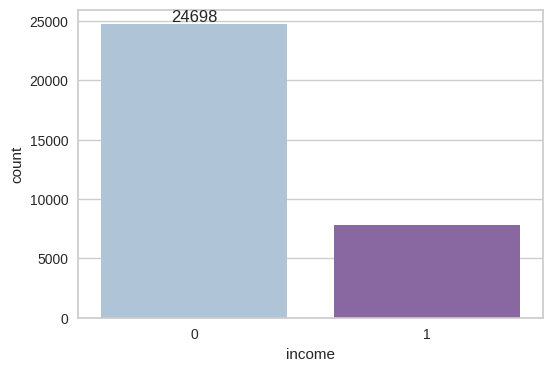

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.countplot( data=df, x="income", palette='BuPu')

ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
list(cat_features)

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

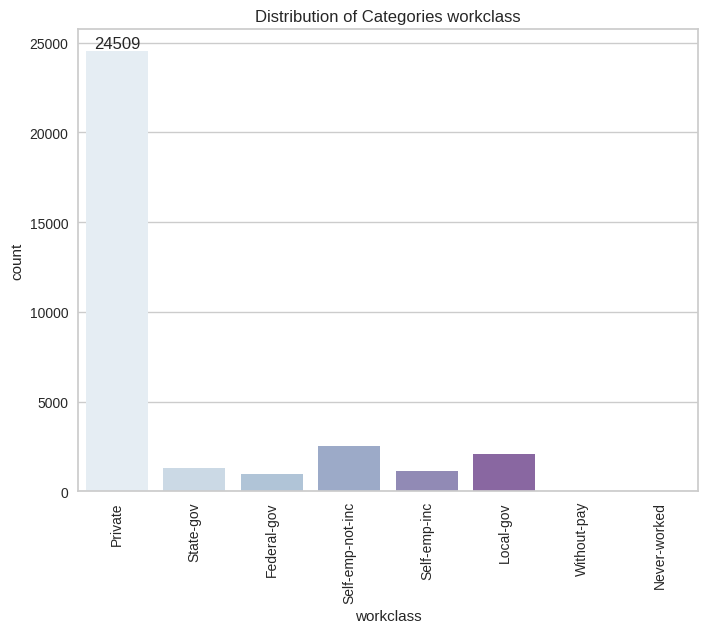

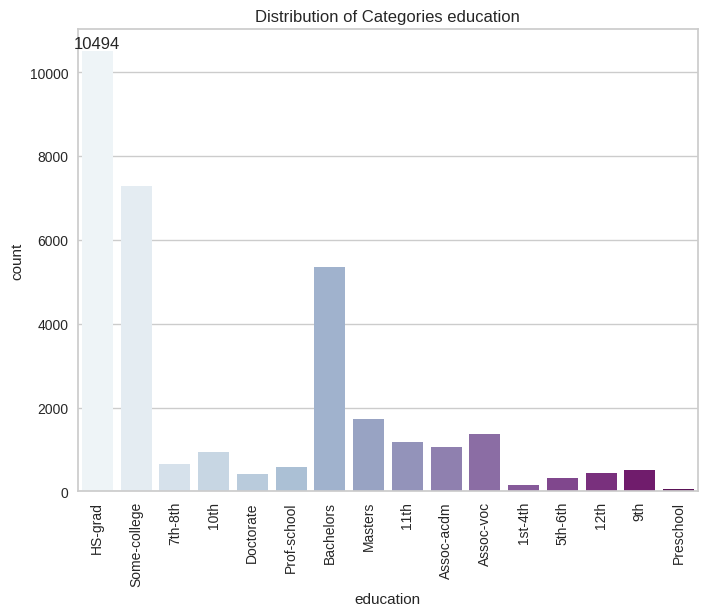

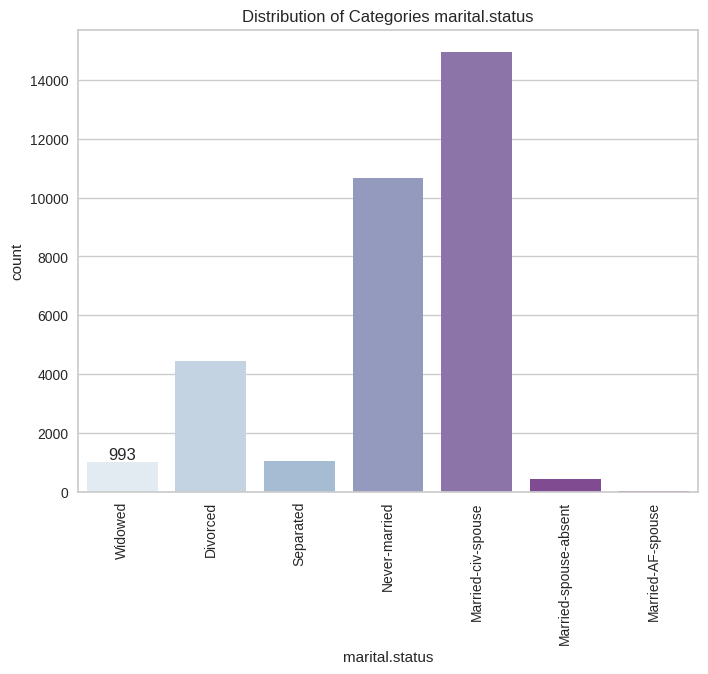

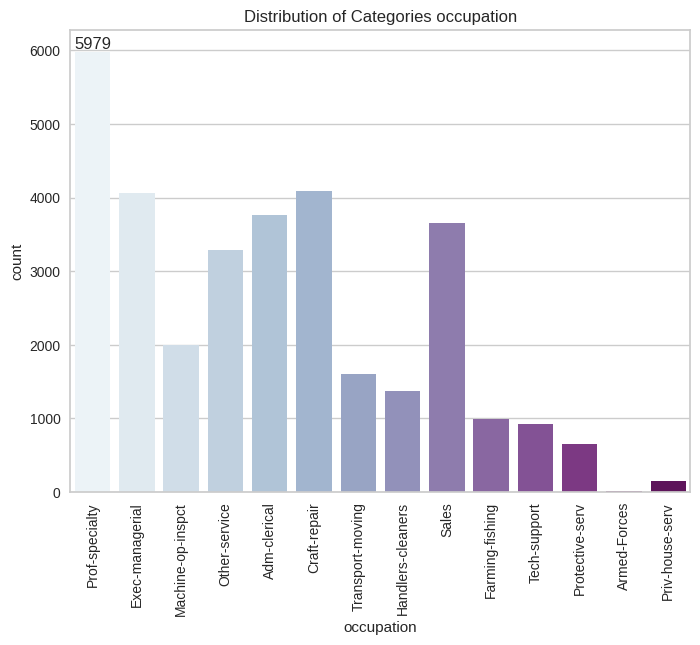

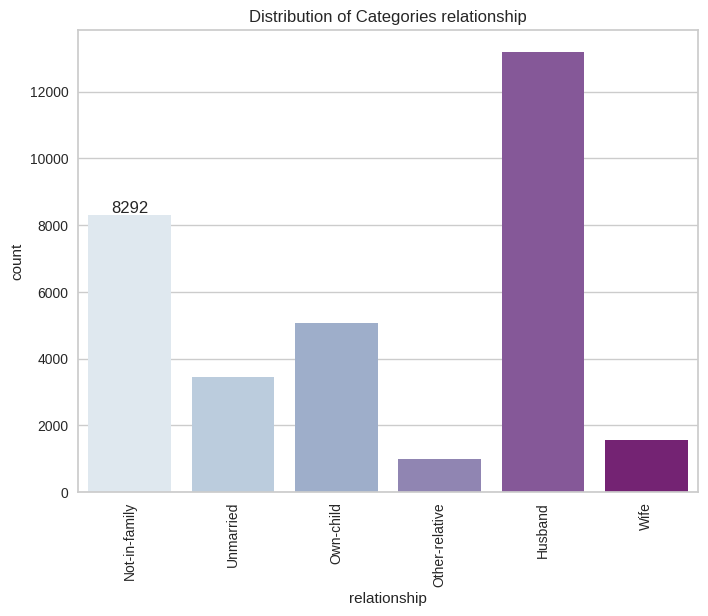

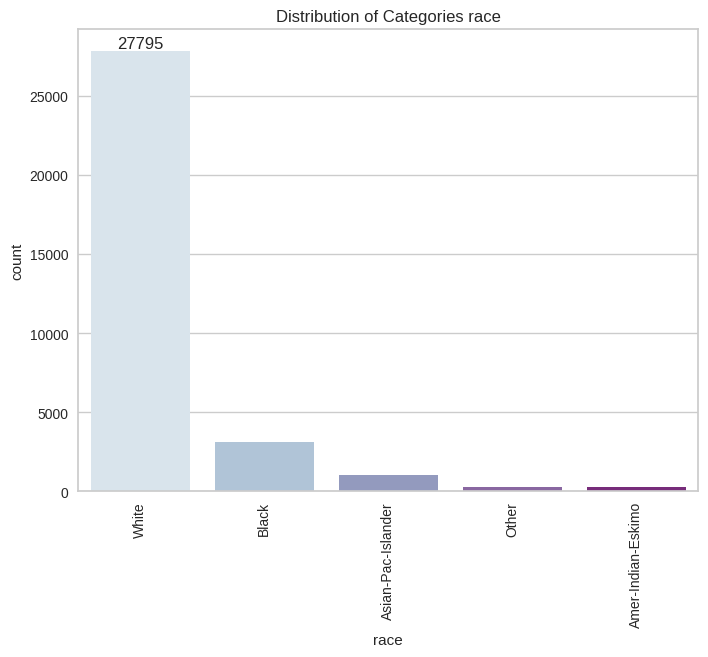

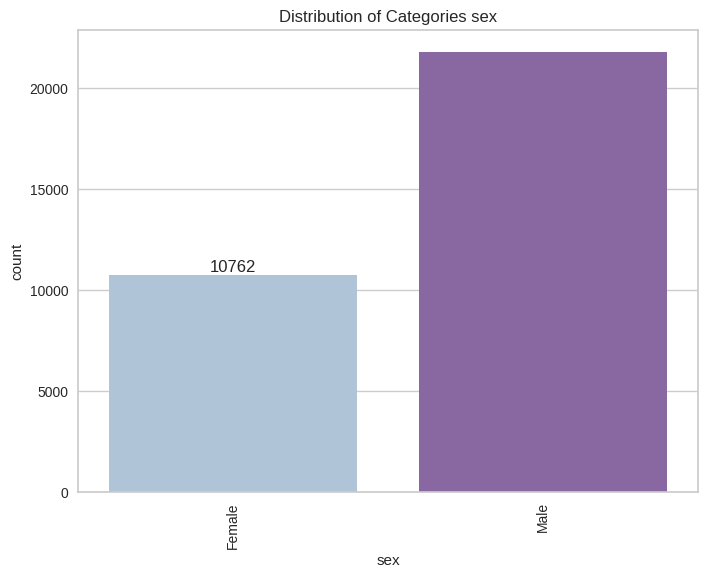

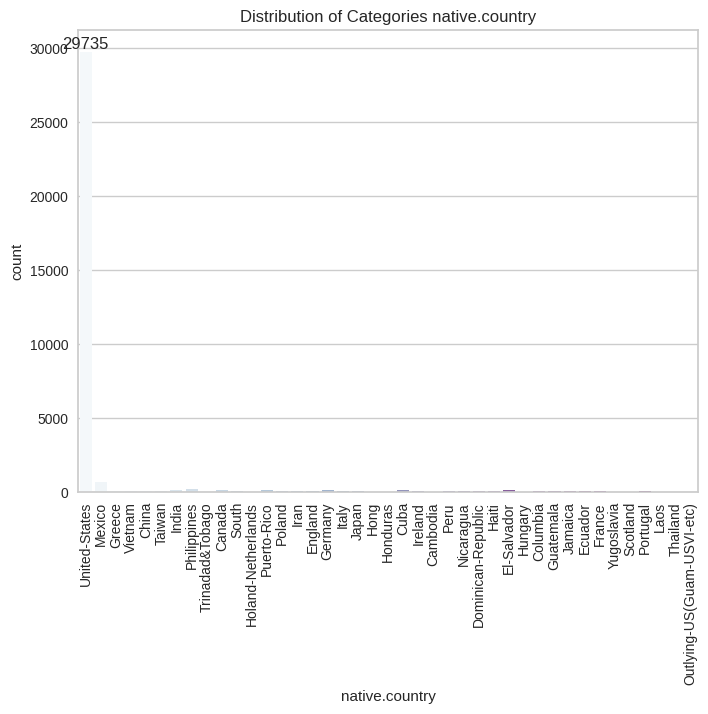

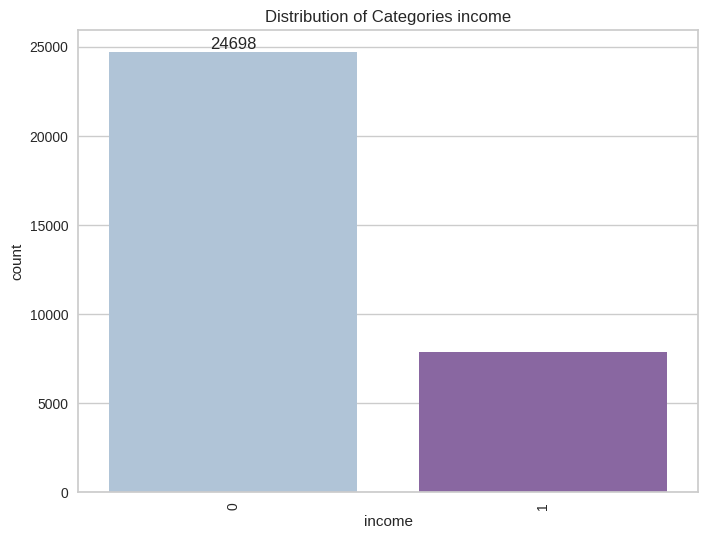

In [ ]:
for column in cat_features:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=column, data=df, palette='BuPu')
    plt.title(f'Distribution of Categories {column}')

    ax.bar_label(ax.containers[0])

    plt.xticks(rotation=90)
    plt.show()


In [ ]:
value_cnt_fonc(df, 'education')

education  counts  norm_counts
0        HS-grad   10494     0.322525
1   Some-college    7282     0.223807
2      Bachelors    5353     0.164520
3        Masters    1722     0.052924
4      Assoc-voc    1382     0.042475
5           11th    1175     0.036113
6     Assoc-acdm    1067     0.032793
7           10th     933     0.028675
8        7th-8th     645     0.019824
9    Prof-school     576     0.017703
10           9th     514     0.015797
11          12th     433     0.013308
12     Doctorate     413     0.012693
13       5th-6th     332     0.010204
14       1st-4th     166     0.005102
15     Preschool      50     0.001537

In [ ]:
df['education'].replace(['1st-4th', '5th-6th'], 'Primary', inplace=True)
df['education'].replace(['7th-8th', '9th', '10th', '11th', '12th'], 'Middle-School', inplace=True)
df['education'].replace(['HS-grad'], 'High-School', inplace=True)
df['education'].replace(['Some-college', 'Assoc-voc', 'Assoc-acdm'], 'College', inplace=True)
df['education'].replace(['Bachelors'], 'Bachelors', inplace=True)
df['education'].replace(['Prof-school', 'Doctorate'], 'Doctorate', inplace=True)

In [ ]:
value_cnt_fonc(df, 'education')

education  counts  norm_counts
0    High-School   10494     0.322525
1        College    9731     0.299075
2      Bachelors    5353     0.164520
3  Middle-School    3700     0.113717
4        Masters    1722     0.052924
5      Doctorate     989     0.030396
6        Primary     498     0.015306
7      Preschool      50     0.001537

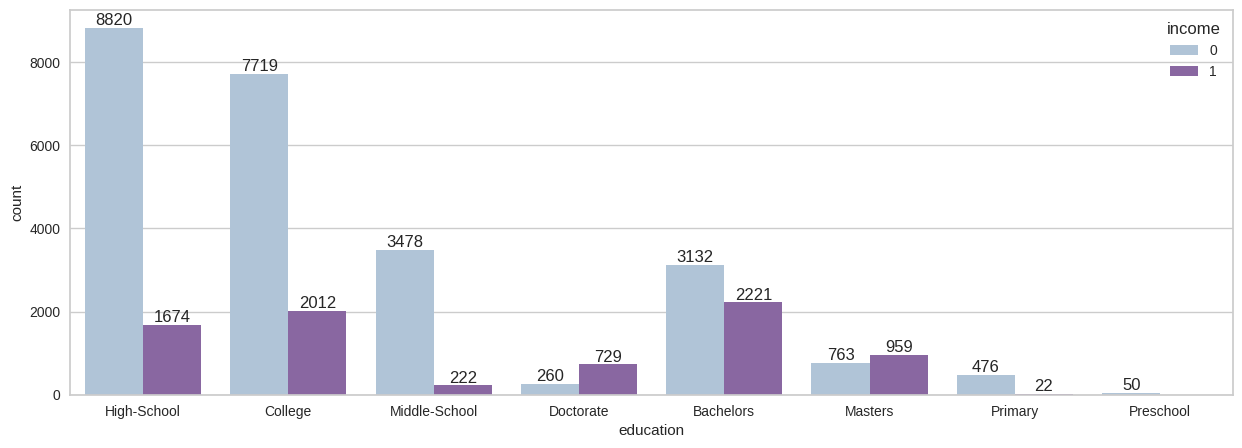

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot( data=df, x="education",hue="income", palette='BuPu')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

In [ ]:
value_cnt_fonc(df, 'race')

race  counts  norm_counts
0               White   27795     0.854258
1               Black    3122     0.095952
2  Asian-Pac-Islander    1038     0.031902
3  Amer-Indian-Eskimo     311     0.009558
4               Other     271     0.008329

In [ ]:
df['race'].replace(['Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Others', inplace = True)

In [ ]:
value_cnt_fonc(df, 'race')

race  counts  norm_counts
0    White   27795     0.854258
1    Black    3122     0.095952
2   Others    1620     0.049789

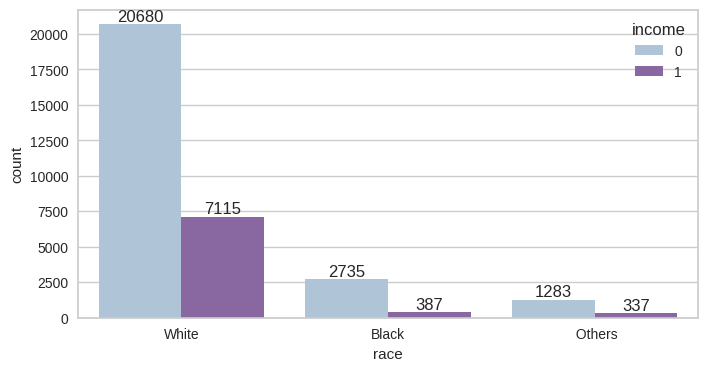

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.countplot( data=df, x="race",hue='income', palette='BuPu')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

In [ ]:
value_cnt_fonc(df, 'native.country')

native.country  counts  norm_counts
0                United-States   29735     0.913883
1                       Mexico     639     0.019639
2                  Philippines     198     0.006085
3                      Germany     137     0.004211
4                       Canada     121     0.003719
5                  Puerto-Rico     114     0.003504
6                  El-Salvador     106     0.003258
7                        India     100     0.003073
8                         Cuba      95     0.002920
9                      England      90     0.002766
10                     Jamaica      81     0.002489
11                       South      80     0.002459
12                       China      75     0.002305
13                       Italy      73     0.002244
14          Dominican-Republic      70     0.002151
15                     Vietnam      67     0.002059
16                   Guatemala      62     0.001906
17                       Japan      62     0.001906
18                      Poland      60     0.001844
19                    Columbia      59     0.001813
20                      Taiwan      51     0.001567
21                       Haiti      44     0.001352
22                        Iran      43     0.001322
23                    Portugal      37     0.001137
24                   Nicaragua      34     0.001045
25                        Peru      31     0.000953
26                      Greece      29     0.000891
27                      France      29     0.000891
28                     Ecuador      28     0.000861
29                     Ireland      24     0.000738
30                        Hong      20     0.000615
31             Trinadad&Tobago      19     0.000584
32                    Cambodia      19     0.000584
33                    Thailand      18     0.000553
34                        Laos      18     0.000553
35                  Yugoslavia      16     0.000492
36  Outlying-US(Guam-USVI-etc)      14     0.000430
37                     Hungary      13     0.000400
38                    Honduras      13     0.000400
39                    Scotland      12     0.000369
40          Holand-Netherlands       1     0.000031

In [ ]:
df['native.country'].loc[df['native.country'] != 'United-States'] = 'Others'

In [ ]:
value_cnt_fonc(df, 'native.country')

native.country  counts  norm_counts
0  United-States   29735     0.913883
1         Others    2802     0.086117

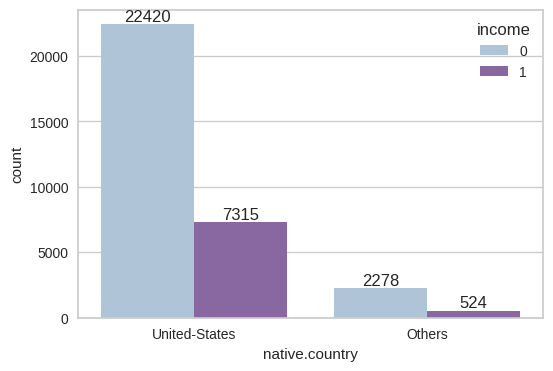

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.countplot( data=df, x="native.country",hue='income', palette='BuPu')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

In [ ]:
value_cnt_fonc(df, 'workclass')

workclass  counts  norm_counts
0           Private   24509     0.753266
1  Self-emp-not-inc    2540     0.078065
2         Local-gov    2093     0.064327
3         State-gov    1298     0.039893
4      Self-emp-inc    1116     0.034299
5       Federal-gov     960     0.029505
6       Without-pay      14     0.000430
7      Never-worked       7     0.000215

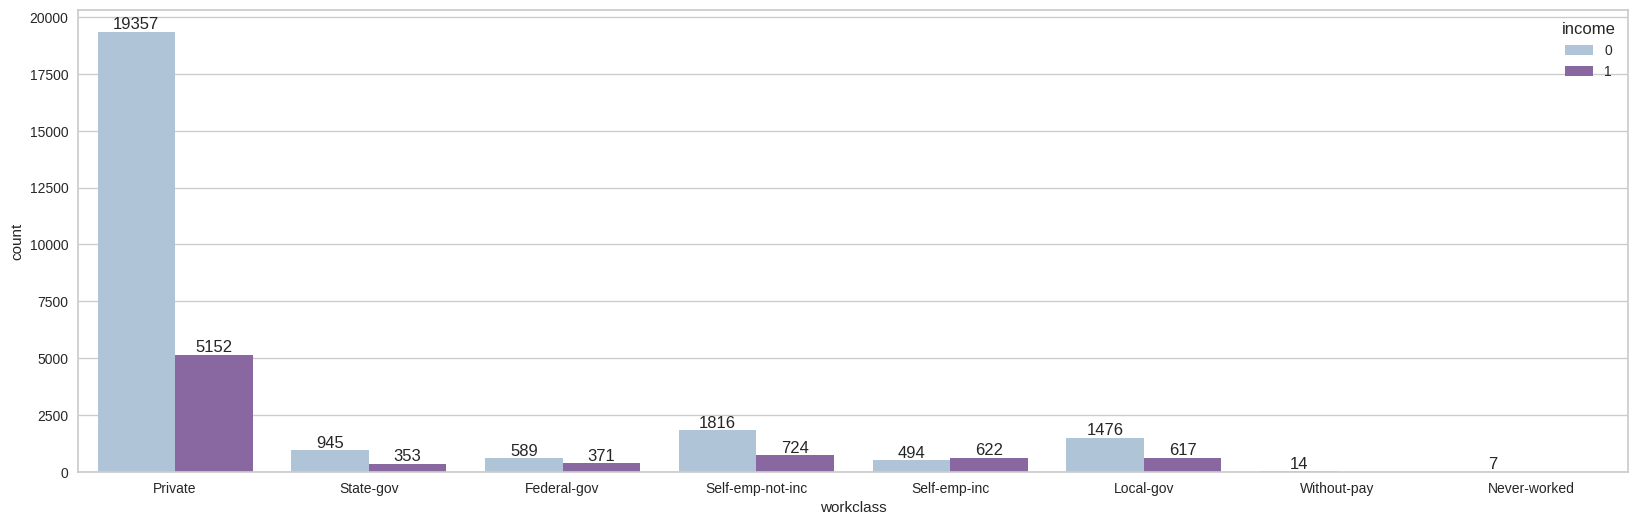

In [ ]:
plt.figure(figsize=(20,6))
ax = sns.countplot( data=df, x="workclass",hue='income', palette='BuPu')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

In [ ]:
value_cnt_fonc(df, 'occupation')

occupation  counts  norm_counts
0      Prof-specialty    5979     0.183760
1        Craft-repair    4094     0.125826
2     Exec-managerial    4065     0.124935
3        Adm-clerical    3768     0.115807
4               Sales    3650     0.112180
5       Other-service    3291     0.101146
6   Machine-op-inspct    2000     0.061468
7    Transport-moving    1597     0.049083
8   Handlers-cleaners    1369     0.042075
9     Farming-fishing     992     0.030488
10       Tech-support     927     0.028491
11    Protective-serv     649     0.019947
12    Priv-house-serv     147     0.004518
13       Armed-Forces       9     0.000277

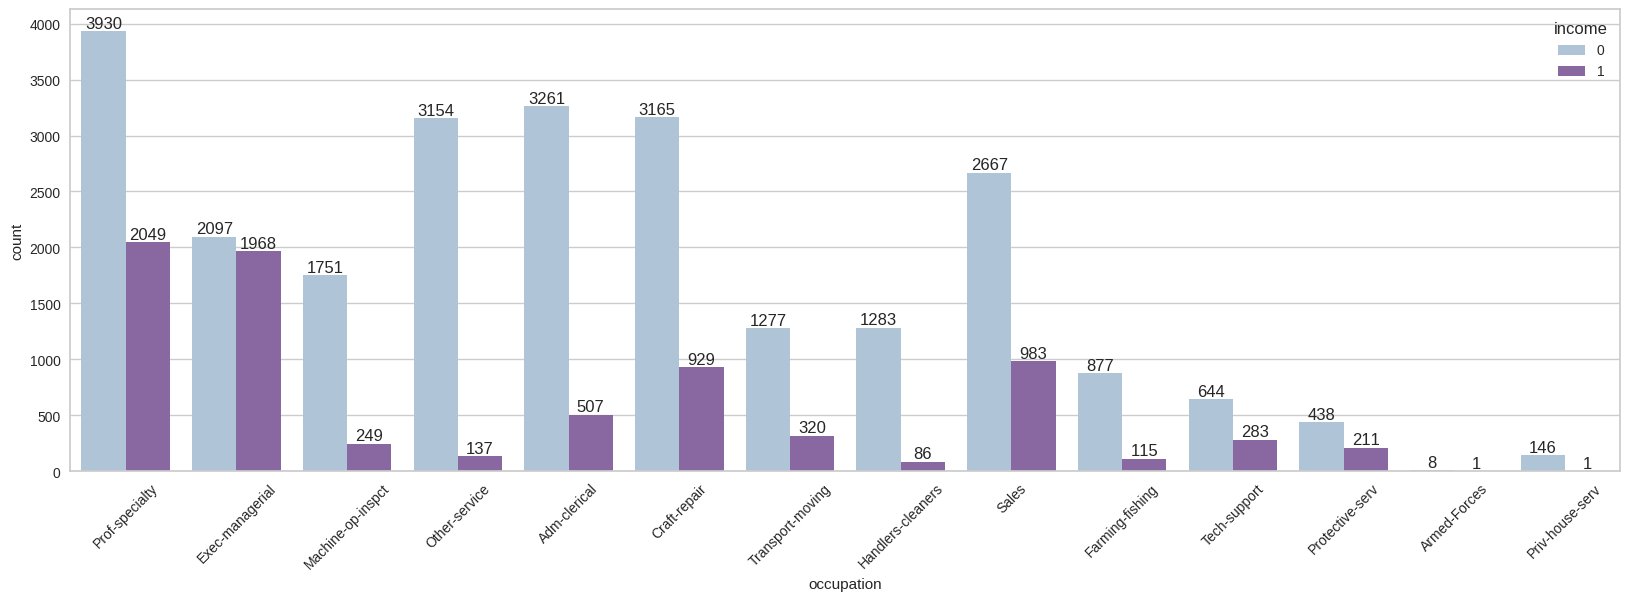

In [ ]:
plt.figure(figsize=(20,6))
ax = sns.countplot( data=df, x="occupation",hue='income', palette='BuPu')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation=45)
plt.show()

In [ ]:
value_cnt_fonc(df, 'marital.status')

marital.status  counts  norm_counts
0     Married-civ-spouse   14970     0.460092
1          Never-married   10667     0.327842
2               Divorced    4441     0.136491
3              Separated    1025     0.031503
4                Widowed     993     0.030519
5  Married-spouse-absent     418     0.012847
6      Married-AF-spouse      23     0.000707

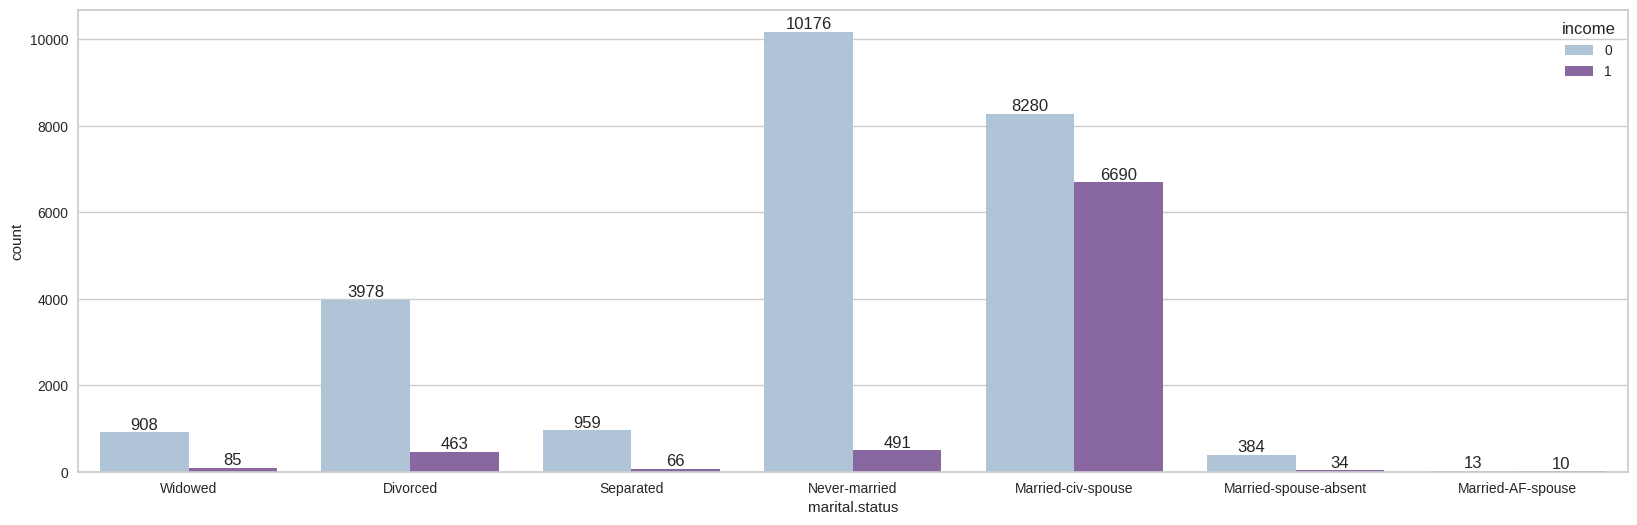

In [ ]:
plt.figure(figsize=(20,6))
ax = sns.countplot( data=df, x="marital.status",hue='income', palette='BuPu')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

In [ ]:
value_cnt_fonc(df, 'relationship')

relationship  counts  norm_counts
0         Husband   13187     0.405292
1   Not-in-family    8292     0.254848
2       Own-child    5064     0.155638
3       Unmarried    3445     0.105879
4            Wife    1568     0.048191
5  Other-relative     981     0.030150

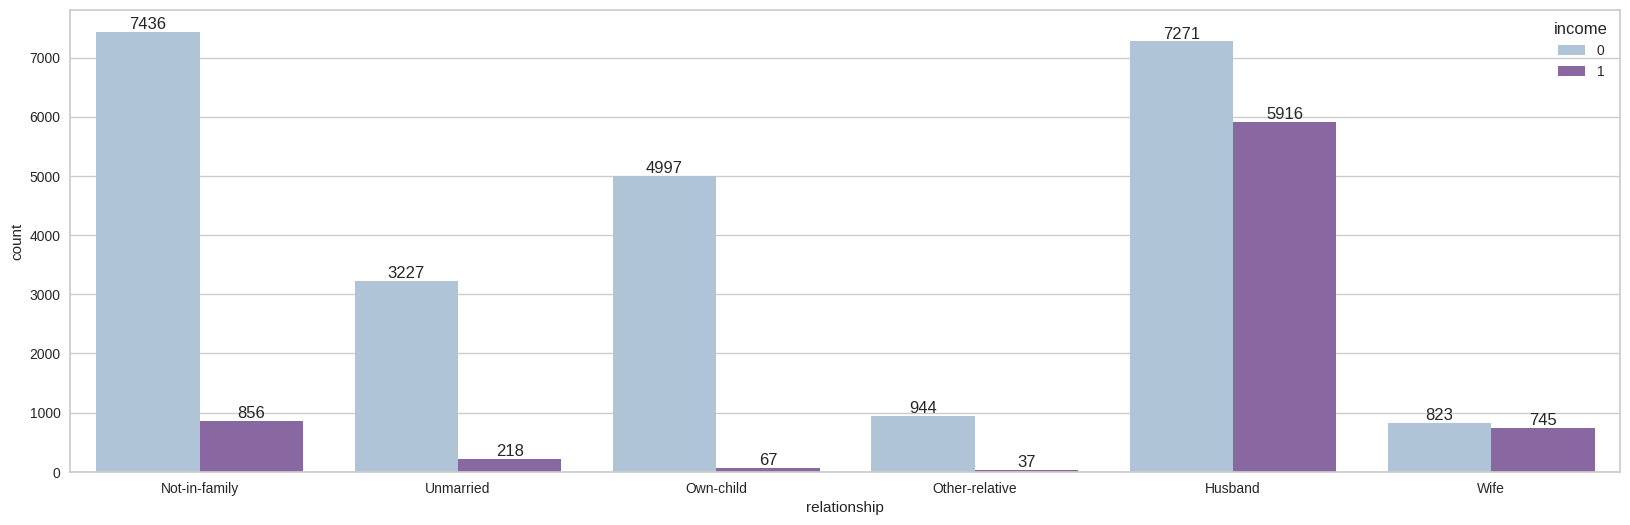

In [ ]:
plt.figure(figsize=(20,6))
ax = sns.countplot( data=df, x="relationship",hue='income', palette='BuPu')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

In [ ]:
value_cnt_fonc(df, 'sex')

sex  counts  norm_counts
0    Male   21775     0.669238
1  Female   10762     0.330762

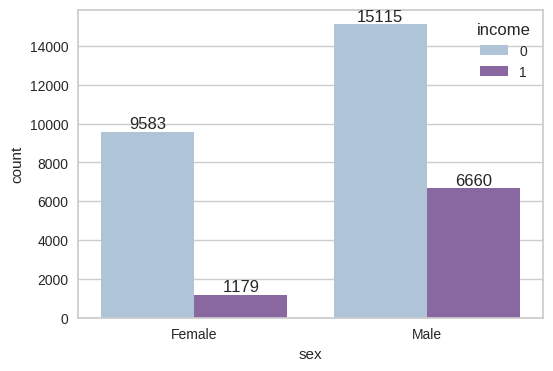

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.countplot( data=df, x="sex",hue='income', palette='BuPu')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

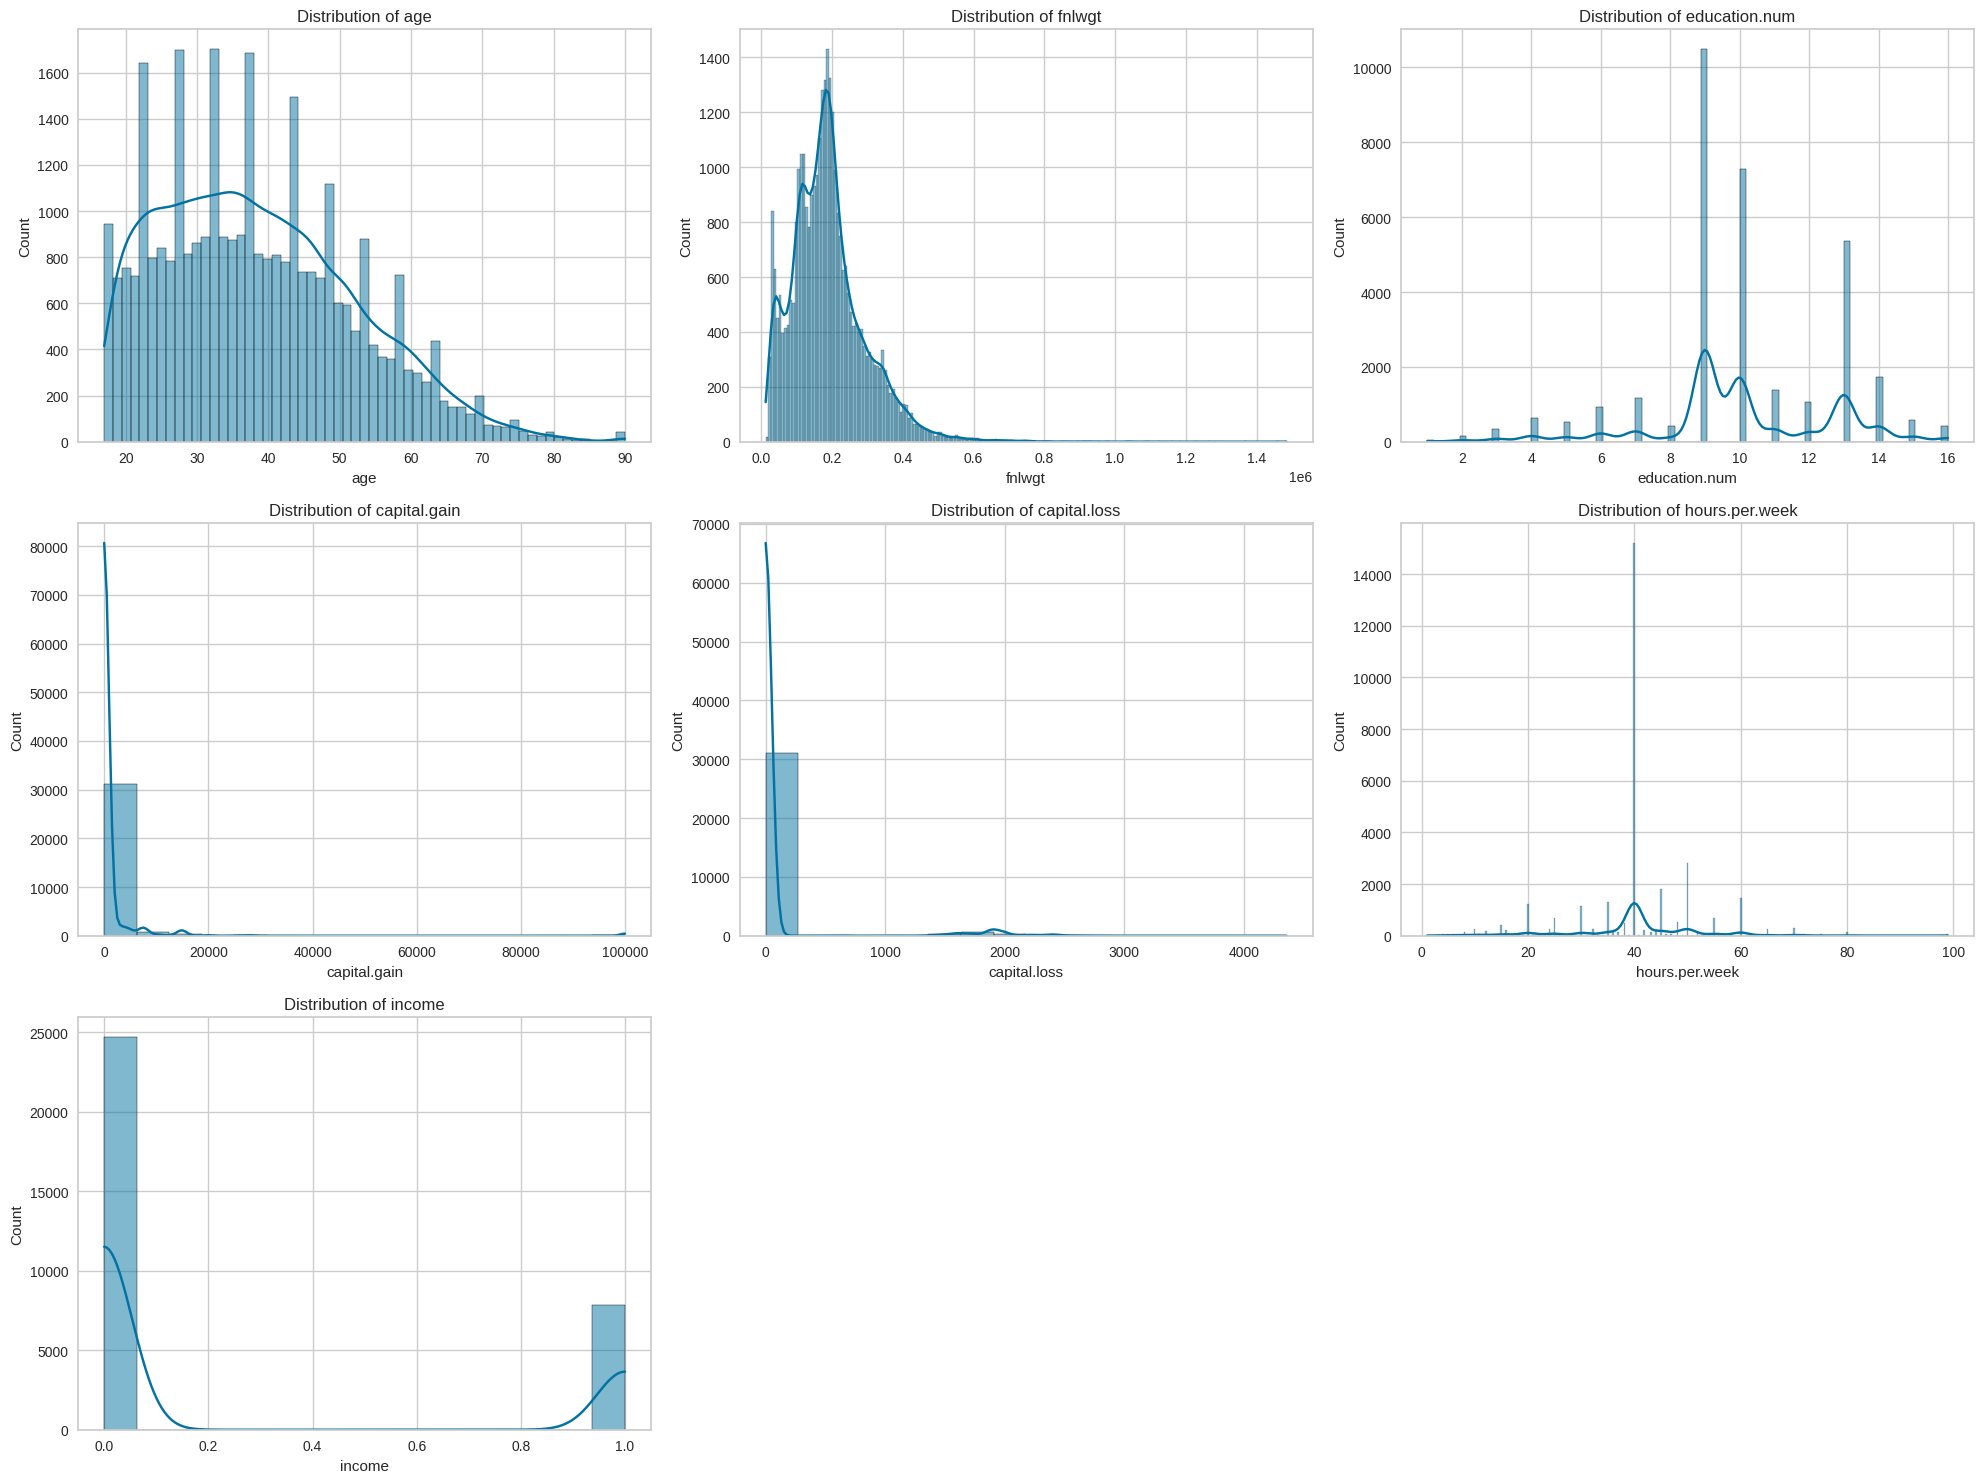

In [ ]:
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(20,15))

num_vars = len(numerical_df.columns)

for i, var in enumerate(numerical_df.columns, 1):
    plt.subplot((num_vars // 3) + 1, 3, i)
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

In [ ]:
px.histogram(df, x='age', color="income", barmode='group', title='Income Distribution by Age')

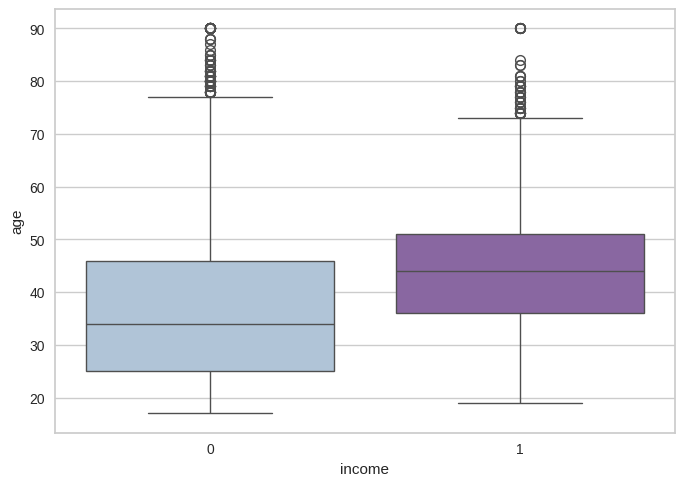

In [ ]:
sns.boxplot(data=df,y="age",x='income',palette='BuPu');

In [ ]:

value_cnt_fonc(df, 'education.num')

education.num  counts  norm_counts
0               9   10494     0.322525
1              10    7282     0.223807
2              13    5353     0.164520
3              14    1722     0.052924
4              11    1382     0.042475
5               7    1175     0.036113
6              12    1067     0.032793
7               6     933     0.028675
8               4     645     0.019824
9              15     576     0.017703
10              5     514     0.015797
11              8     433     0.013308
12             16     413     0.012693
13              3     332     0.010204
14              2     166     0.005102
15              1      50     0.001537

In [ ]:
px.histogram(df, x='education.num', color="income", barmode='group', title='Income Distribution by Education Num')

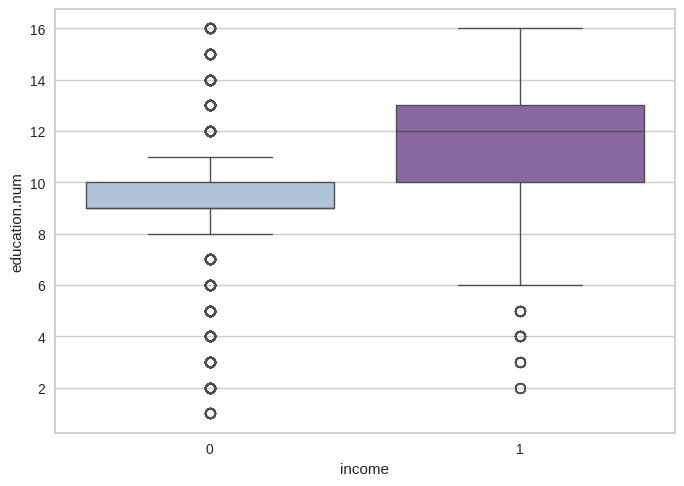

In [ ]:
sns.boxplot(data=df,y="education.num",x='income', palette='BuPu');

In [ ]:
value_cnt_fonc(df, 'capital.gain')

capital.gain  counts  norm_counts
0               0   29825     0.916649
1           15024     347     0.010665
2            7688     284     0.008729
3            7298     246     0.007561
4           99999     159     0.004887
..            ...     ...          ...
114          1111       1     0.000031
115          4931       1     0.000031
116          7978       1     0.000031
117          5060       1     0.000031
118          2538       1     0.000031

[119 rows x 3 columns]

In [ ]:
value_cnt_fonc(df, 'capital.loss')

capital.loss  counts  norm_counts
0              0   31018     0.953315
1           1902     202     0.006208
2           1977     168     0.005163
3           1887     159     0.004887
4           1485      51     0.001567
..           ...     ...          ...
87          2201       1     0.000031
88          2163       1     0.000031
89          1944       1     0.000031
90          1539       1     0.000031
91          2472       1     0.000031

[92 rows x 3 columns]

In [ ]:
df['capital_diff'] = df['capital.gain'] - df['capital.loss']
df['capital_diff'] = pd.cut(df['capital_diff'], bins = [-5000, 5000, 100000], labels = ['Low', 'High'])
df['capital_diff'] = df['capital_diff'].astype('object')
df.drop(['capital.gain'], axis = 1, inplace = True)
df.drop(['capital.loss'], axis = 1, inplace = True)

In [ ]:
value_cnt_fonc(df, 'capital_diff')

capital_diff  counts  norm_counts
0          Low   30889      0.94935
1         High    1648      0.05065

In [ ]:
px.histogram(df, x='capital_diff', color="income", barmode='group', title='Income Distribution by Capital Diff')

In [ ]:
value_cnt_fonc(df, 'hours.per.week')

hours.per.week  counts  norm_counts
0               40   15204     0.467283
1               50    2817     0.086578
2               45    1823     0.056029
3               60    1475     0.045333
4               35    1296     0.039832
..             ...     ...          ...
89              94       1     0.000031
90              82       1     0.000031
91              92       1     0.000031
92              87       1     0.000031
93              74       1     0.000031

[94 rows x 3 columns]

In [ ]:
px.histogram(df, x='hours.per.week', color="income", barmode='group', title='Income Distribution by Hours per Week')

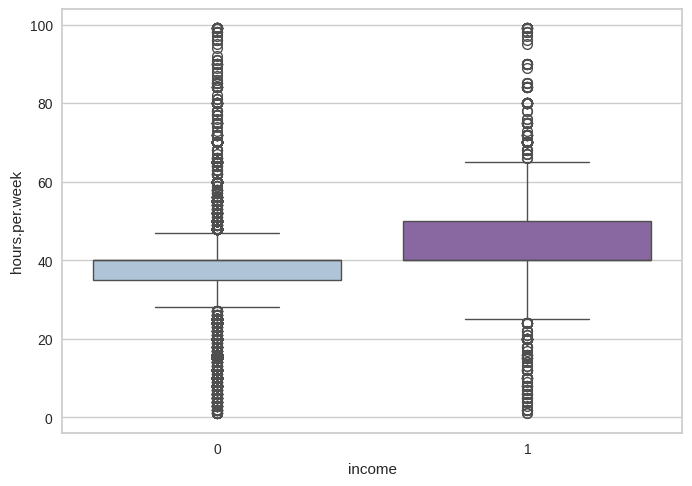

In [ ]:
sns.boxplot(data=df,y="hours.per.week",x='income', palette='BuPu');

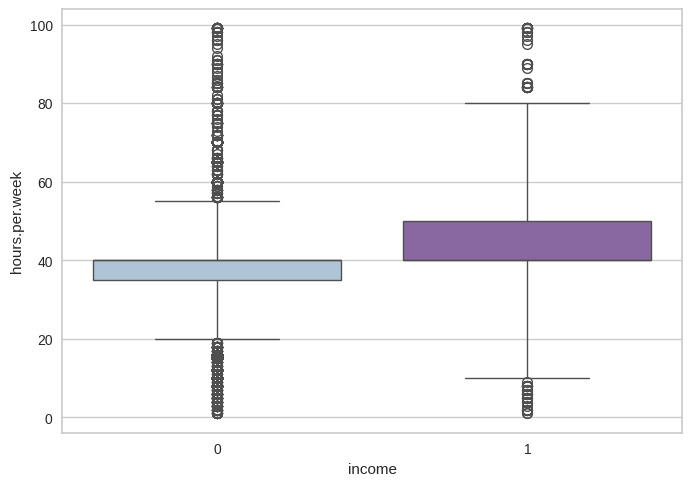

In [ ]:
sns.boxplot(data=df,y="hours.per.week",x='income', palette='BuPu', whis=3);

In [ ]:
len(df[df["hours.per.week"]>72])

427

In [ ]:
len(df[df["hours.per.week"] < 20])


1700

In [ ]:
len(df[(df["hours.per.week"] > 72) | (df["hours.per.week"] < 20)])

2127

In [ ]:
df = df[~((df["hours.per.week"] > 72) | (df["hours.per.week"] < 20))]

In [ ]:
df.shape

(30410, 14)

In [ ]:
px.histogram(df, x='fnlwgt', color="income", barmode='group', title='Income Distribution by fnlwgt')

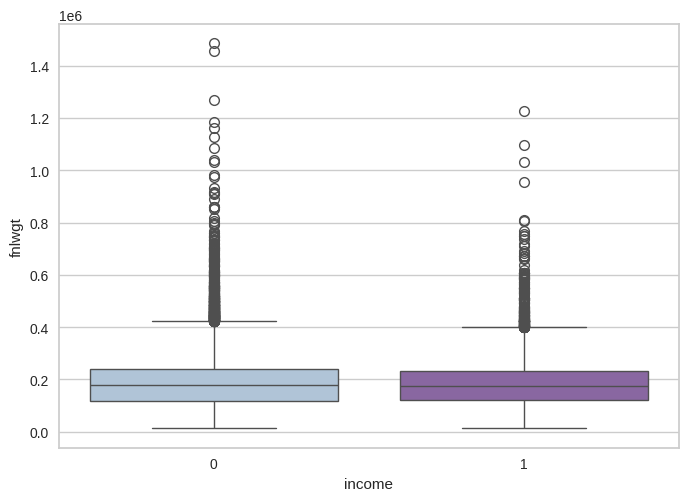

In [ ]:
sns.boxplot(data=df,y="fnlwgt",x='income', palette='BuPu');

In [ ]:
df.drop(['fnlwgt'], axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30410 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30410 non-null  int64 
 1   workclass       30410 non-null  object
 2   education       30410 non-null  object
 3   education.num   30410 non-null  int64 
 4   marital.status  30410 non-null  object
 5   occupation      30410 non-null  object
 6   relationship    30410 non-null  object
 7   race            30410 non-null  object
 8   sex             30410 non-null  object
 9   hours.per.week  30410 non-null  int64 
 10  native.country  30410 non-null  object
 11  income          30410 non-null  int64 
 12  capital_diff    30410 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [ ]:
df.sample(3)

age  workclass  education  education.num      marital.status  \
27340   51  Local-gov    Masters             14  Married-civ-spouse   
14879   36  Local-gov    Masters             14       Never-married   
21399   38  Local-gov  Bachelors             13  Married-civ-spouse   

           occupation   relationship   race     sex  hours.per.week  \
27340  Prof-specialty           Wife  White  Female              70   
14879  Prof-specialty  Not-in-family  Black  Female              40   
21399  Prof-specialty        Husband  White    Male              45   

      native.country  income capital_diff  
27340  United-States       1          Low  
14879  United-States       0          Low  
21399  United-States       1          Low

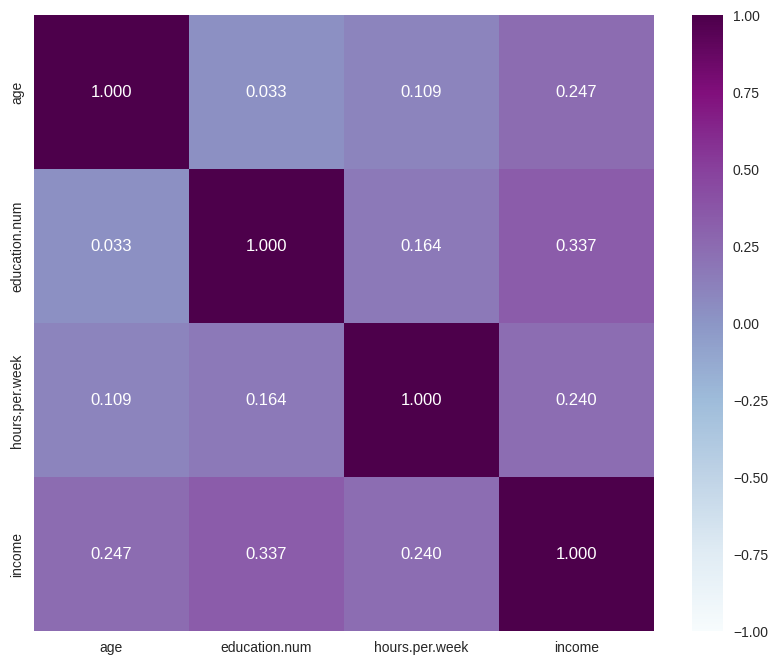

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes("number").corr(), vmin = -1, vmax = 1, annot = True, fmt = '.3f', cmap='BuPu');

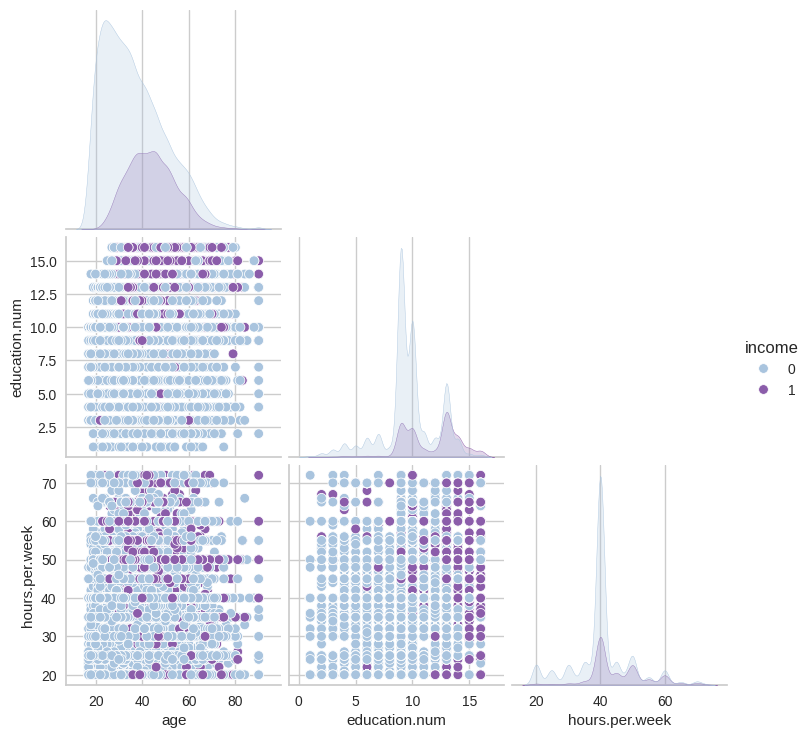

In [ ]:
sns.pairplot(data=df, corner=True, hue='income',palette='BuPu');

In [ ]:
def color_custom(val):
    if val > 0.90 and val < 0.99:
        color = 'red'
    elif val >= 1:
        color = 'blue'
    else:
        color = 'black'
    return f'color: {color}'

df.select_dtypes("number").corr().style.map(color_custom)

In [ ]:
print(f"Income <= 50K (0) count: {income_less_50K}")
print(f"Income >  50K (1) count: {income_over_50K}")

Income <= 50K (0) count: 24698
Income >  50K (1) count: 7839


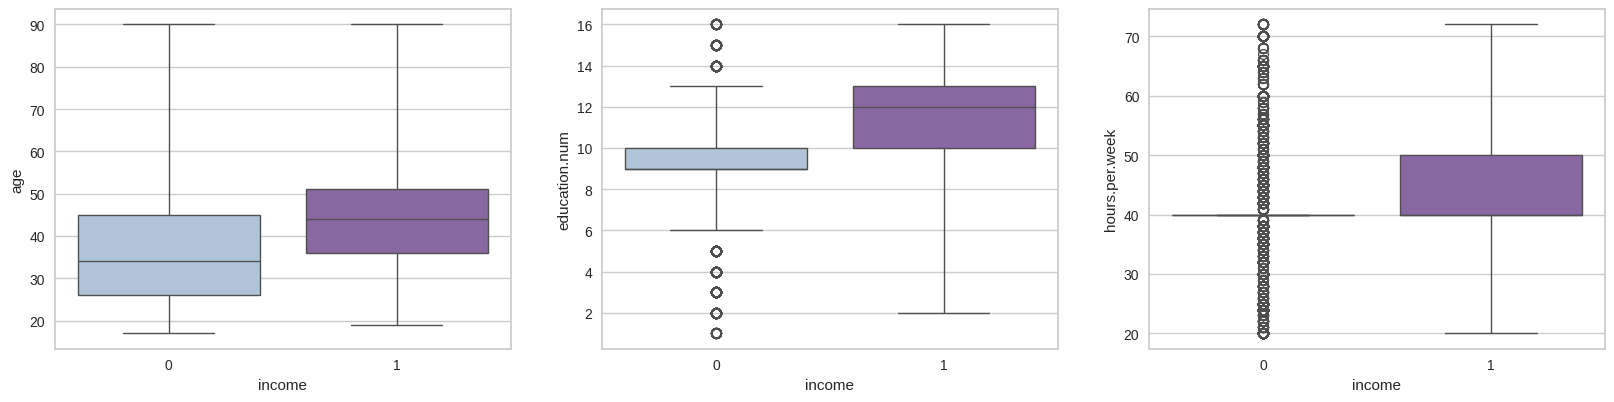

In [ ]:
index = 0
plt.figure(figsize=(20,15))
for feature in df.select_dtypes(include=['number']).columns:
    if feature != "income":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='income',y=feature,data=df, whis=3, palette='BuPu')
plt.show()


In [ ]:
cat_features = df.select_dtypes(include='object').columns
num_features = df.select_dtypes(include=['int64','float64']).columns

print('Categoricals:', list(cat_features))
print('---------------------------')
print('Numericals:',list(num_features))

Categoricals: ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'capital_diff']
---------------------------
Numericals: ['age', 'education.num', 'hours.per.week', 'income']


In [ ]:
df.sample(3)

age         workclass    education  education.num      marital.status  \
6002    19           Private  High-School              9       Never-married   
16115   42           Private  High-School              9  Married-civ-spouse   
7362    71  Self-emp-not-inc  High-School              9             Widowed   

              occupation   relationship   race     sex  hours.per.week  \
6002   Handlers-cleaners      Own-child  White    Male              30   
16115   Transport-moving        Husband  White    Male              50   
7362        Adm-clerical  Not-in-family  White  Female              35   

      native.country  income capital_diff  
6002   United-States       0          Low  
16115  United-States       1          Low  
7362   United-States       0          Low

In [ ]:
X= df.drop(columns="income")
y= df.income

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [ ]:
onehot_categorics = ["workclass", "marital.status", "occupation", "relationship", "race", "sex", "native.country"]
ordinal_categorics = ["education", "capital_diff"]

column_transformed = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse_output=False), onehot_categorics),
                                       (OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), ordinal_categorics),
                                       remainder='passthrough')

In [ ]:
X_train_trans = column_transformed.fit_transform(X_train)
X_test_trans = column_transformed.transform(X_test)

In [ ]:
X_train_trans.shape, X_test_trans.shape

((24328, 47), (6082, 47))

In [ ]:
features = column_transformed.get_feature_names_out()
features

array(['onehotencoder__workclass_Federal-gov',
       'onehotencoder__workclass_Local-gov',
       'onehotencoder__workclass_Never-worked',
       'onehotencoder__workclass_Private',
       'onehotencoder__workclass_Self-emp-inc',
       'onehotencoder__workclass_Self-emp-not-inc',
       'onehotencoder__workclass_State-gov',
       'onehotencoder__workclass_Without-pay',
       'onehotencoder__marital.status_Divorced',
       'onehotencoder__marital.status_Married-AF-spouse',
       'onehotencoder__marital.status_Married-civ-spouse',
       'onehotencoder__marital.status_Married-spouse-absent',
       'onehotencoder__marital.status_Never-married',
       'onehotencoder__marital.status_Separated',
       'onehotencoder__marital.status_Widowed',
       'onehotencoder__occupation_Adm-clerical',
       'onehotencoder__occupation_Armed-Forces',
       'onehotencoder__occupation_Craft-repair',
       'onehotencoder__occupation_Exec-managerial',
       'onehotencoder__occupation_Farming-fish

In [ ]:
X_train= pd.DataFrame(X_train_trans, columns=features, index=X_train.index)
X_train.head()

onehotencoder__workclass_Federal-gov  \
7378                                    0.0   
1937                                    0.0   
10749                                   0.0   
23929                                   0.0   
22481                                   0.0   

       onehotencoder__workclass_Local-gov  \
7378                                  0.0   
1937                                  0.0   
10749                                 0.0   
23929                                 0.0   
22481                                 0.0   

       onehotencoder__workclass_Never-worked  \
7378                                     0.0   
1937                                     0.0   
10749                                    0.0   
23929                                    0.0   
22481                                    0.0   

       onehotencoder__workclass_Private  \
7378                                1.0   
1937                                0.0   
10749                               1.0   
23929                               1.0   
22481                               1.0   

       onehotencoder__workclass_Self-emp-inc  \
7378                                     0.0   
1937                                     1.0   
10749                                    0.0   
23929                                    0.0   
22481                                    0.0   

       onehotencoder__workclass_Self-emp-not-inc  \
7378                                         0.0   
1937                                         0.0   
10749                                        0.0   
23929                                        0.0   
22481                                        0.0   

       onehotencoder__workclass_State-gov  \
7378                                  0.0   
1937                                  0.0   
10749                                 0.0   
23929                                 0.0   
22481                                 0.0   

       onehotencoder__workclass_Without-pay  \
7378                                    0.0   
1937                                    0.0   
10749                                   0.0   
23929                                   0.0   
22481                                   0.0   

       onehotencoder__marital.status_Divorced  \
7378                                      0.0   
1937                                      0.0   
10749                                     1.0   
23929                                     0.0   
22481                                     0.0   

       onehotencoder__marital.status_Married-AF-spouse  ...  \
7378                                               0.0  ...   
1937                                               0.0  ...   
10749                                              0.0  ...   
23929                                              0.0  ...   
22481                                              0.0  ...   

       onehotencoder__race_White  onehotencoder__sex_Female  \
7378                         1.0                        0.0   
1937                         1.0                        0.0   
10749                        1.0                        0.0   
23929                        0.0                        0.0   
22481                        1.0                        1.0   

       onehotencoder__sex_Male  onehotencoder__native.country_Others  \
7378                       1.0                                   0.0   
1937                       1.0                                   0.0   
10749                      1.0                                   0.0   
23929                      1.0                                   0.0   
22481                      0.0                                   0.0   

       onehotencoder__native.country_United-States  ordinalencoder__education  \
7378                                           1.0                        5.0   
1937                                           1.0                        1.0   
10749               

In [ ]:
X_test= pd.DataFrame(X_test_trans, columns=features, index=X_test.index)
X_test.head()

onehotencoder__workclass_Federal-gov  \
15234                                   0.0   
30963                                   0.0   
18499                                   0.0   
7790                                    0.0   
26879                                   0.0   

       onehotencoder__workclass_Local-gov  \
15234                                 0.0   
30963                                 1.0   
18499                                 0.0   
7790                                  0.0   
26879                                 0.0   

       onehotencoder__workclass_Never-worked  \
15234                                    0.0   
30963                                    0.0   
18499                                    0.0   
7790                                     0.0   
26879                                    0.0   

       onehotencoder__workclass_Private  \
15234                               1.0   
30963                               0.0   
18499                               1.0   
7790                                1.0   
26879                               1.0   

       onehotencoder__workclass_Self-emp-inc  \
15234                                    0.0   
30963                                    0.0   
18499                                    0.0   
7790                                     0.0   
26879                                    0.0   

       onehotencoder__workclass_Self-emp-not-inc  \
15234                                        0.0   
30963                                        0.0   
18499                                        0.0   
7790                                         0.0   
26879                                        0.0   

       onehotencoder__workclass_State-gov  \
15234                                 0.0   
30963                                 0.0   
18499                                 0.0   
7790                                  0.0   
26879                                 0.0   

       onehotencoder__workclass_Without-pay  \
15234                                   0.0   
30963                                   0.0   
18499                                   0.0   
7790                                    0.0   
26879                                   0.0   

       onehotencoder__marital.status_Divorced  \
15234                                     0.0   
30963                                     0.0   
18499                                     1.0   
7790                                      1.0   
26879                                     0.0   

       onehotencoder__marital.status_Married-AF-spouse  ...  \
15234                                              0.0  ...   
30963                                              0.0  ...   
18499                                              0.0  ...   
7790                                               0.0  ...   
26879                                              0.0  ...   

       onehotencoder__race_White  onehotencoder__sex_Female  \
15234                        1.0                        1.0   
30963                        0.0                        0.0   
18499                        1.0                        1.0   
7790                         1.0                        0.0   
26879                        1.0                        0.0   

       onehotencoder__sex_Male  onehotencoder__native.country_Others  \
15234                      0.0                                   0.0   
30963                      1.0                                   0.0   
18499                      0.0                                   0.0   
7790                       1.0                                   0.0   
26879                      1.0                                   0.0   

       onehotencoder__native.country_United-States  ordinalencoder__education  \
15234                                          1.0                        3.0   
30963                                          1.0                        3.0   
18499               

In [ ]:
corr_by_income = X_train.join(y_train).corr()["income"].sort_values()[:-1]
corr_by_income

ordinalencoder__capital_diff                          -0.357570
onehotencoder__marital.status_Never-married           -0.314213
onehotencoder__relationship_Own-child                 -0.221005
onehotencoder__sex_Female                             -0.210939
onehotencoder__relationship_Not-in-family             -0.193319
ordinalencoder__education                             -0.164939
onehotencoder__occupation_Other-service               -0.154886
onehotencoder__relationship_Unmarried                 -0.147372
onehotencoder__marital.status_Divorced                -0.132096
onehotencoder__workclass_Private                      -0.127657
onehotencoder__occupation_Adm-clerical                -0.092074
onehotencoder__race_Black                             -0.090854
onehotencoder__occupation_Handlers-cleaners           -0.089431
onehotencoder__relationship_Other-relative            -0.083928
onehotencoder__marital.status_Separated               -0.076641
onehotencoder__occupation_Machine-op-inspct           -0.076483
onehotencoder__marital.status_Widowed                 -0.060090
onehotencoder__occupation_Farming-fishing             -0.055590
onehotencoder__marital.status_Married-spouse-absent   -0.043274
onehotencoder__native.country_Others                  -0.041719
onehotencoder__occupation_Priv-house-serv             -0.033910
onehotencoder__occupation_Transport-moving            -0.024402
onehotencoder__occupation_Craft-repair                -0.017401
onehotencoder__race_ Others                           -0.016491
onehotencoder__workclass_Without-pay                  -0.009773
onehotencoder__workclass_Never-worked                 -0.007388
onehotencoder__occupation_Armed-Forces                -0.004170
onehotencoder__workclass_State-gov                     0.015388
onehotencoder__marital.status_Married-AF-spouse        0.022290
onehotencoder__workclass_Self-emp-not-inc              0.028635
onehotencoder__occupation_Sales                        0.028951
onehotencoder__occupation_Tech-support                 0.030713
onehotencoder__occupation_Protective-serv              0.031129
onehotencoder__workclass_Local-gov                     0.034995
onehotencoder__native.country_United-States            0.041719
onehotencoder__workclass_Federal-gov                   0.061921
onehotencoder__race_White                              0.086126
onehotencoder__occupation_Prof-specialty               0.120956
onehotencoder__relationship_Wife                       0.123757
onehotencoder__workclass_Self-emp-inc                  0.139121
onehotencoder__occupation_Exec-managerial              0.210296
onehotencoder__sex_Male                                0.210939
remainder__hours.per.week                              0.240863
remainder__age                                         0.243469
remainder__education.num                               0.334915
onehotencoder__relationship_Husband                    0.395761
onehotencoder__marital.status_Married-civ-spouse       0.439405
Name: income, dtype: float64

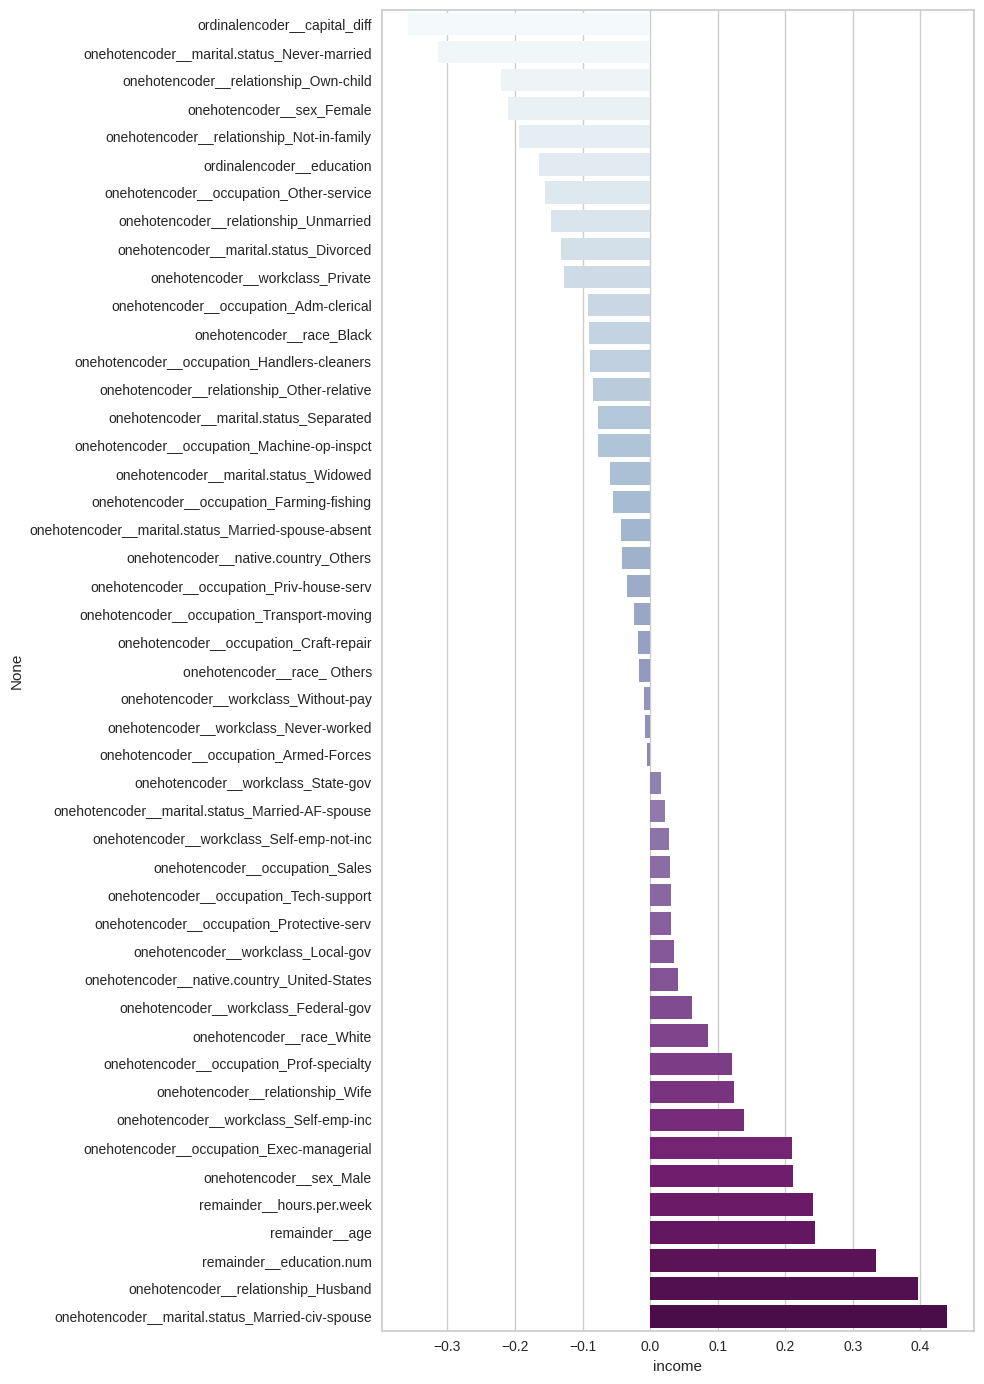

In [ ]:
plt.figure(figsize = (10,14))
sns.barplot(y = corr_by_income.index, x = corr_by_income,palette='BuPu')
plt.tight_layout();

In [ ]:
logistic_model = Pipeline([("scaler", MinMaxScaler()), ("logistic", LogisticRegression())])

logistic_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('logistic', LogisticRegression())])

In [ ]:
y_pred=logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)

log_f1 = f1_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_auc = roc_auc_score(y_test, y_pred)

In [ ]:
coefficients = logistic_model["logistic"].coef_[0]

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': coefficients
})

# Sort by importance
logistic_fi = feature_importances.sort_values(by='Importance', ascending=False)
logistic_fi.head(10)

Feature  Importance
45                          remainder__education.num    4.661115
44                                    remainder__age    1.918749
46                         remainder__hours.per.week    1.828463
9    onehotencoder__marital.status_Married-AF-spouse    1.578302
34                  onehotencoder__relationship_Wife    1.218004
10  onehotencoder__marital.status_Married-civ-spouse    1.066136
18         onehotencoder__occupation_Exec-managerial    0.853528
27            onehotencoder__occupation_Tech-support    0.769093
25         onehotencoder__occupation_Protective-serv    0.661074
0               onehotencoder__workclass_Federal-gov    0.620479

In [ ]:
print(f"Income <= 50K (0) count: {income_less_50K}")
print(f"Income >  50K (1) count: {income_over_50K}")

Income <= 50K (0) count: 24698
Income >  50K (1) count: 7839


In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test, i):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print(f"{i} Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print(f"{i} Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
eval_metric(logistic_model, X_train, y_train, X_test, y_test, 'logistic_model')

logistic_model Test_Set
[[4272  295]
 [ 588  927]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4567
           1       0.76      0.61      0.68      1515

    accuracy                           0.85      6082
   macro avg       0.82      0.77      0.79      6082
weighted avg       0.85      0.85      0.85      6082


logistic_model Train_Set
[[16986  1280]
 [ 2477  3585]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     18266
           1       0.74      0.59      0.66      6062

    accuracy                           0.85     24328
   macro avg       0.80      0.76      0.78     24328
weighted avg       0.84      0.85      0.84     24328



logistic_model ROC_AUC Score: 0.9045484863791832
--------------------------------------------------


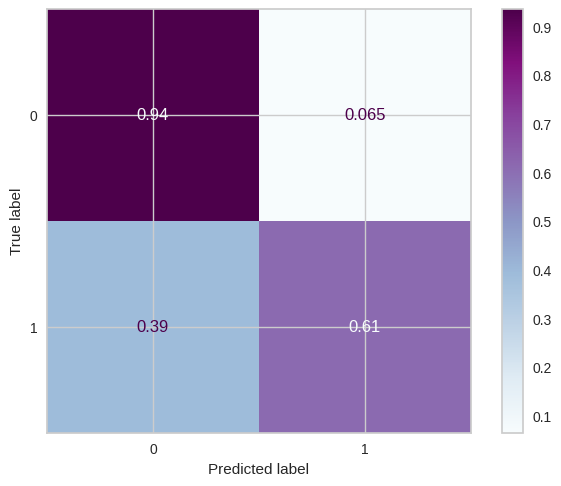

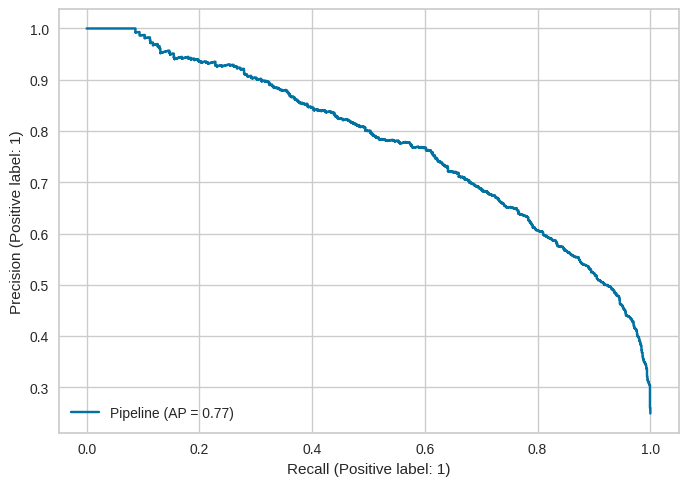

In [ ]:
print('logistic_model ROC_AUC Score:', roc_auc_score(y_test, y_pred_proba[:,1]))
print('--------------------------------------------------')

# Confusion Matrix
log_matrix = ConfusionMatrixDisplay.from_estimator(logistic_model, X_test, y_test, normalize='true', cmap='BuPu')

# Precision-Recall Curve
log_prCurve = PrecisionRecallDisplay.from_estimator(logistic_model, X_test, y_test)

In [ ]:
model = Pipeline([("scaler", MinMaxScaler()), ("logistic", LogisticRegression())])

cv = StratifiedKFold(n_splits=10) # for unbalanced data validation

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision', 'recall', 'f1'],
                        cv=cv,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.845034
train_accuracy     0.845299
test_precision     0.735819
train_precision    0.736636
test_recall        0.590233
train_recall       0.590143
test_f1            0.654811
train_f1           0.655300
dtype: float64

In [ ]:
logistic_model.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()), ('logistic', LogisticRegression())],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'logistic': LogisticRegression(),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'logistic__C': 1.0,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 100,
 'logistic__multi_class': 'auto',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': None,
 'logistic__solver': 'lbfgs',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False}

In [ ]:
model = Pipeline([("scaler", MinMaxScaler()), ("logistic", LogisticRegression(max_iter = 1000))])

# Define hyperparameters for tuning
penalty = ["l1", "l2"]       # Regularization terms: l1 (Lasso) and l2 (Ridge)
C  = [0.01, 0.1, 1]    # Regularization strength; inverse of regularization parameter
class_weight= ["balanced", None] # for unbalanced data


param_grid = [
    {
        "logistic__penalty" : ['l2', 'none'],
        "logistic__C" : C,
        "logistic__class_weight": class_weight,
        "logistic__solver": ['sag', 'lbfgs']
    },
    {
        "logistic__penalty" : ['l1', 'l2'],
        "logistic__C" : C,
        "logistic__class_weight": class_weight,
        "logistic__solver": ['liblinear', 'saga']
    }
]

cv = StratifiedKFold(n_splits = 5) # for unbalanced data
grid_model = GridSearchCV(model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = "recall",
                          n_jobs = -1, # Uses all available cores
                          verbose=1,
                          return_train_score=True).fit(X_train, y_train) # Returns training scores

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [ ]:
print('Best Params:', grid_model.best_params_)
print('Best Recall Score(test):', grid_model.best_score_)
print('Best Score Index:', grid_model.best_index_)

Best Params: {'logistic__C': 0.01, 'logistic__class_weight': 'balanced', 'logistic__penalty': 'l1', 'logistic__solver': 'saga'}
Best Recall Score(test): 0.8670377837453985
Best Score Index: 25


In [ ]:
pd.DataFrame(grid_model.cv_results_).loc[25 , ["mean_test_score", "mean_train_score"]]

mean_test_score     0.867038
mean_train_score    0.868071
Name: 25, dtype: object

In [ ]:
y_pred=grid_model.predict(X_test)
y_pred_proba = grid_model.predict_proba(X_test)


log_grid_f1 = f1_score(y_test, y_pred)
log_grid_recall = recall_score(y_test, y_pred)
log_grid_auc = roc_auc_score(y_test, y_pred)

In [ ]:
test_data = pd.concat([X_test, y_test], axis=1)

# Create new column for 'predicted' classes to compore with actual target classes
test_data["pred"] = y_pred

# Filtering the wrong predicted obs
wrong_pred = test_data[((test_data["income"] == 0) & (test_data["pred"] == 1)) |
             ((test_data["income"] == 1) & (test_data["pred"] == 0))]

print('log_grid_model Total Incorrect Predictions:', wrong_pred.shape)


print('------------------------------------------------')
# Actual-Predicted-Probalility of Pozitive Class(1)

my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1]}
pd.DataFrame.from_dict(my_dict).sample(10)

log_grid_model Total Incorrect Predictions: (1315, 49)
------------------------------------------------


Actual  Pred   Proba_1
28004       0     1  0.564602
30992       0     0  0.071531
17976       0     0  0.313835
20520       1     1  0.557961
3640        0     0  0.211374
26586       0     1  0.696288
23492       0     0  0.284704
21563       0     0  0.209902
15642       0     0  0.032334
32430       1     1  0.632255

In [ ]:
eval_metric(grid_model, X_train, y_train, X_test, y_test, 'log_grid_model')

log_grid_model Test_Set
[[3458 1109]
 [ 206 1309]]
              precision    recall  f1-score   support

           0       0.94      0.76      0.84      4567
           1       0.54      0.86      0.67      1515

    accuracy                           0.78      6082
   macro avg       0.74      0.81      0.75      6082
weighted avg       0.84      0.78      0.80      6082


log_grid_model Train_Set
[[13750  4516]
 [  823  5239]]
              precision    recall  f1-score   support

           0       0.94      0.75      0.84     18266
           1       0.54      0.86      0.66      6062

    accuracy                           0.78     24328
   macro avg       0.74      0.81      0.75     24328
weighted avg       0.84      0.78      0.79     24328



log_grid_model ROC_AUC Score: 0.8983590126036909
--------------------------------------------------


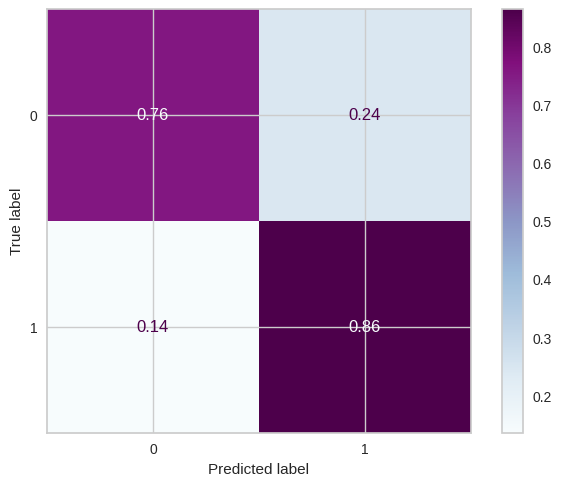

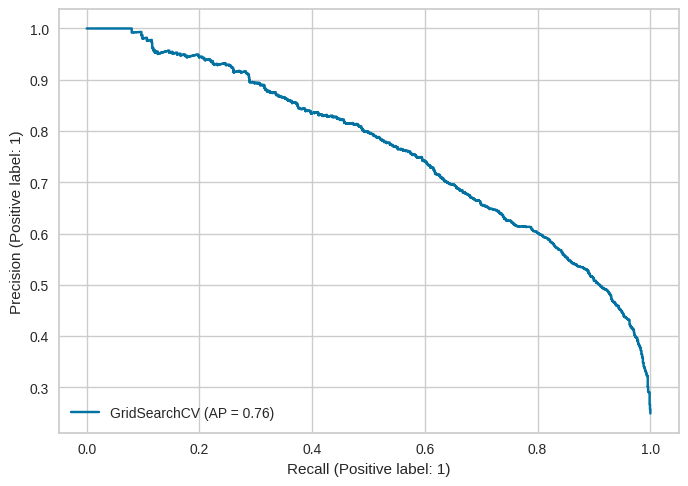

In [ ]:
print('log_grid_model ROC_AUC Score:', roc_auc_score(y_test, y_pred_proba[:,1]))
print('--------------------------------------------------')


# Confusion Matrix
grid_log_matrix = ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test, normalize='true', cmap='BuPu')

# Precision-Recall Curve
grid_log_prCurve = PrecisionRecallDisplay.from_estimator(grid_model, X_test, y_test)

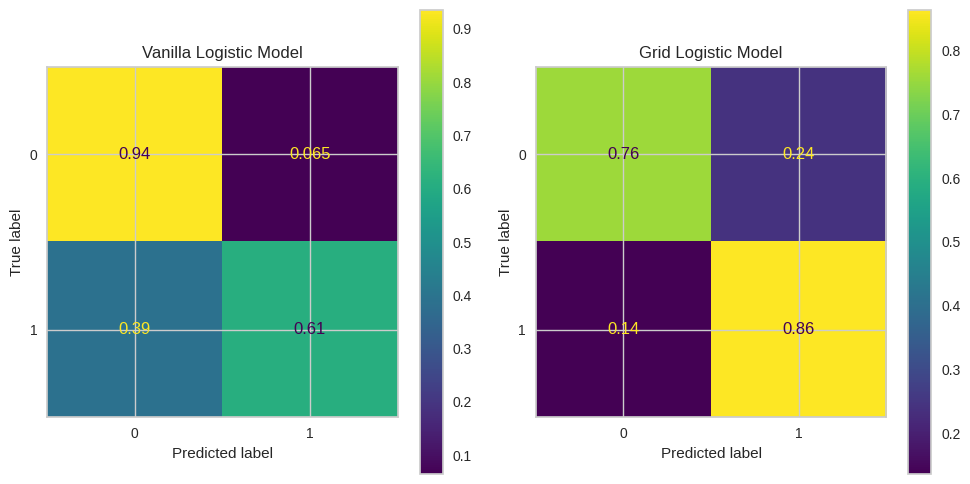

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

log_matrix.plot(ax=ax[0])
ax[0].set_title("Vanilla Logistic Model")
grid_log_matrix.plot(ax=ax[1])
ax[1].set_title("Grid Logistic Model")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Grid Model - Precision Recall Curve')

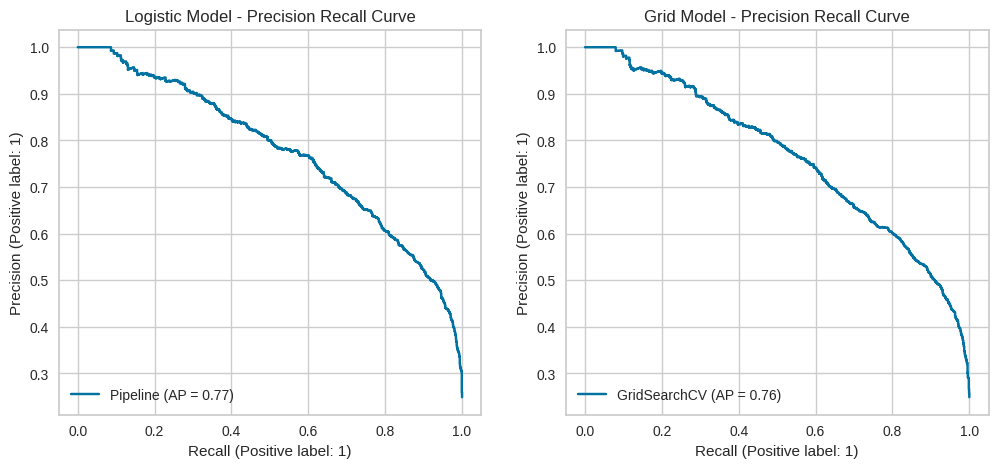

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

log_prCurve.plot(ax=ax[0])
ax[0].set_title("Logistic Model - Precision Recall Curve")
grid_log_prCurve.plot(ax=ax[1])
ax[1].set_title("Grid Model - Precision Recall Curve")

In [ ]:
svm_model = Pipeline([("scaler", MinMaxScaler()), ("SVC", SVC(probability=True))])

#Fit the model
svm_model.fit(X_train, y_train)

# Prediction
y_pred=svm_model.predict(X_test)

In [ ]:
eval_metric(svm_model, X_train, y_train, X_test, y_test, 'svm_model')

svm_model Test_Set
[[4243  324]
 [ 582  933]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4567
           1       0.74      0.62      0.67      1515

    accuracy                           0.85      6082
   macro avg       0.81      0.77      0.79      6082
weighted avg       0.85      0.85      0.85      6082


svm_model Train_Set
[[16977  1289]
 [ 2472  3590]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     18266
           1       0.74      0.59      0.66      6062

    accuracy                           0.85     24328
   macro avg       0.80      0.76      0.78     24328
weighted avg       0.84      0.85      0.84     24328



svm_model ROC_AUC Score: 0.8983590126036909
--------------------------------------------------


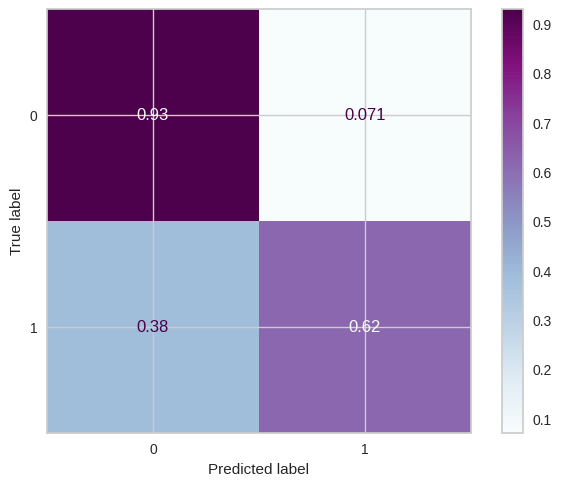

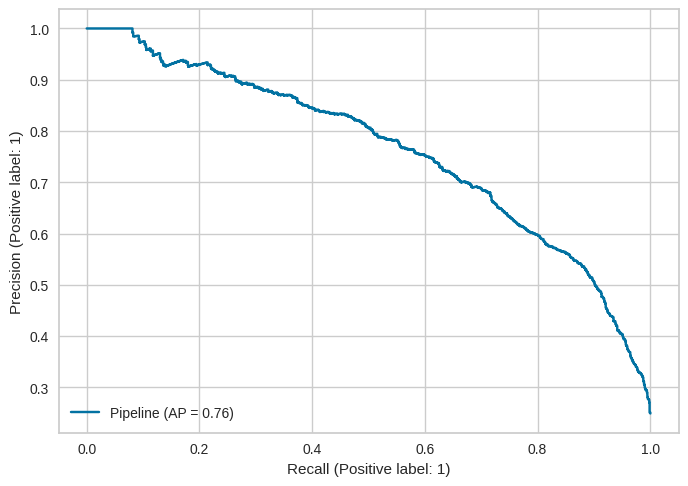

In [ ]:
print('svm_model ROC_AUC Score:', roc_auc_score(y_test, y_pred_proba[:,1]))
print('--------------------------------------------------')

# Confusion Matrix
svm_matrix = ConfusionMatrixDisplay.from_estimator(svm_model, X_test,y_test, normalize='true', cmap='BuPu' )

# Precision-Recall Curve
svm_prCurve = PrecisionRecallDisplay.from_estimator(svm_model, X_test, y_test)

In [ ]:
model = Pipeline([("scaler", MinMaxScaler()), ("SVC", SVC())])

cv = StratifiedKFold(n_splits=5) # for unbalanced data validation

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision', 'recall', 'f1'],
                        cv=cv,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_accuracy      0.842815
train_accuracy     0.845641
test_precision     0.729220
train_precision    0.736658
test_recall        0.587264
train_recall       0.592338
test_f1            0.650547
train_f1           0.656617
dtype: float64

In [ ]:
svm_model.get_params()

In [ ]:
model = Pipeline([("scaler", MinMaxScaler()), ("SVC", SVC(class_weight="balanced"))])


param_grid = {"SVC__C":[0.5,1],
             "SVC__gamma":["scale","auto", 0.1,0.3],
             "SVC__kernel":["rbf", "linear"]}

cv = StratifiedKFold(n_splits = 5) # for unbalanced data

svm_grid_model = GridSearchCV(model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = "recall_macro",
                          n_jobs = -1, # Uses all available cores
                          verbose=1,
                          return_train_score=True).fit(X_train, y_train) # fit the model

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [ ]:
print('Best Params:', svm_grid_model.best_params_)
print('Best Recall Score(test):', svm_grid_model.best_score_)
print('Best Score Index:', svm_grid_model.best_index_)

Best Params: {'SVC__C': 1, 'SVC__gamma': 'scale', 'SVC__kernel': 'rbf'}
Best Recall Score(test): 0.8119453688234672
Best Score Index: 8


In [ ]:
pd.DataFrame(svm_grid_model.cv_results_).loc[14, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.811642
mean_train_score    0.832004
Name: 14, dtype: object

In [ ]:
y_pred=svm_grid_model.predict(X_test)
decision_fonc = svm_grid_model.decision_function(X_test)
# In an SVM model with probability=True, predict_proba uses the decision function's output, applying Platt scaling to provide probability estimates.

svm_grid_f1 = f1_score(y_test, y_pred)
svm_grid_recall = recall_score(y_test, y_pred)
svm_grid_auc = roc_auc_score(y_test, y_pred)

In [ ]:
# Checking the Incorrect Predictions

# Test Data df
test_data = pd.concat([X_test, y_test], axis=1)

# Create new column for 'predicted' classes to compore with actual target classes
test_data["pred"] = y_pred

# Filtering the wrong predicted obs
wrong_pred = test_data[((test_data["income"] == 0) & (test_data["pred"] == 1)) |
             ((test_data["income"] == 1) & (test_data["pred"] == 0))]

print('svm_grid_model Total Incorrect Predictions:', wrong_pred.shape)


print('------------------------------------------------')
# Actual-Predicted-Probalility of Pozitive Class(1)

my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1]}
pd.DataFrame.from_dict(my_dict).sample(10)

svm_grid_model Total Incorrect Predictions: (1241, 49)
------------------------------------------------


Actual  Pred   Proba_1
26982       0     0  0.321105
17536       0     0  0.090360
21951       0     0  0.046785
23021       0     0  0.149390
8661        0     0  0.071340
6992        0     1  0.627051
12342       0     1  0.520753
28755       0     1  0.762226
31538       0     1  0.780580
17348       0     1  0.703307

In [ ]:
eval_metric(svm_grid_model, X_train, y_train, X_test, y_test, 'svm_grid_model')

svm_grid_model Test_Set
[[3554 1013]
 [ 228 1287]]
              precision    recall  f1-score   support

           0       0.94      0.78      0.85      4567
           1       0.56      0.85      0.67      1515

    accuracy                           0.80      6082
   macro avg       0.75      0.81      0.76      6082
weighted avg       0.85      0.80      0.81      6082


svm_grid_model Train_Set
[[14179  4087]
 [  815  5247]]
              precision    recall  f1-score   support

           0       0.95      0.78      0.85     18266
           1       0.56      0.87      0.68      6062

    accuracy                           0.80     24328
   macro avg       0.75      0.82      0.77     24328
weighted avg       0.85      0.80      0.81     24328



svm_grid_model ROC_AUC Score: 0.8997057380360326
--------------------------------------------------


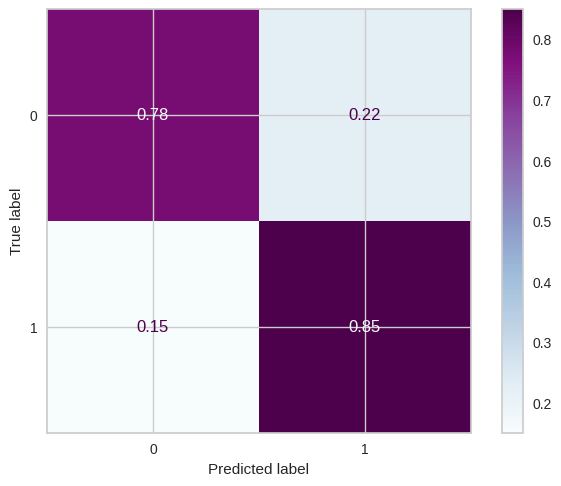

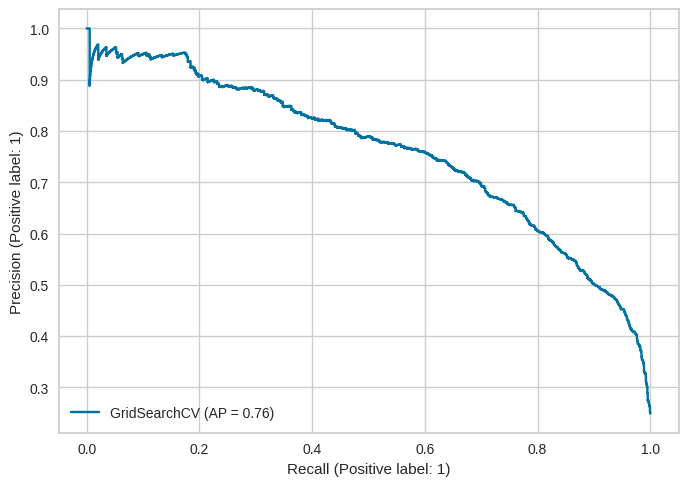

In [ ]:
# Roc_AUC_score
print('svm_grid_model ROC_AUC Score:', roc_auc_score(y_test, decision_fonc))
print('--------------------------------------------------')

# Confusion Matrix
svm_grid_matrix = ConfusionMatrixDisplay.from_estimator(svm_grid_model, X_test, y_test, normalize='true', cmap='BuPu')

# Precision-Recall Curve
svm_grid_prCurve = PrecisionRecallDisplay.from_estimator(svm_grid_model, X_test, y_test)

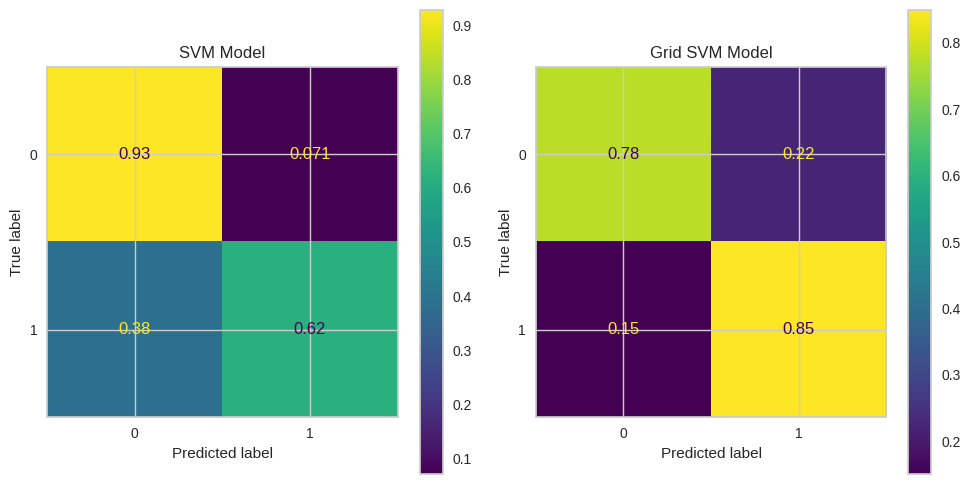

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

svm_matrix.plot(ax=ax[0])
ax[0].set_title("SVM Model")
svm_grid_matrix.plot(ax=ax[1])
ax[1].set_title("Grid SVM Model")

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Grid SVM Model - Precision Recall Curve')

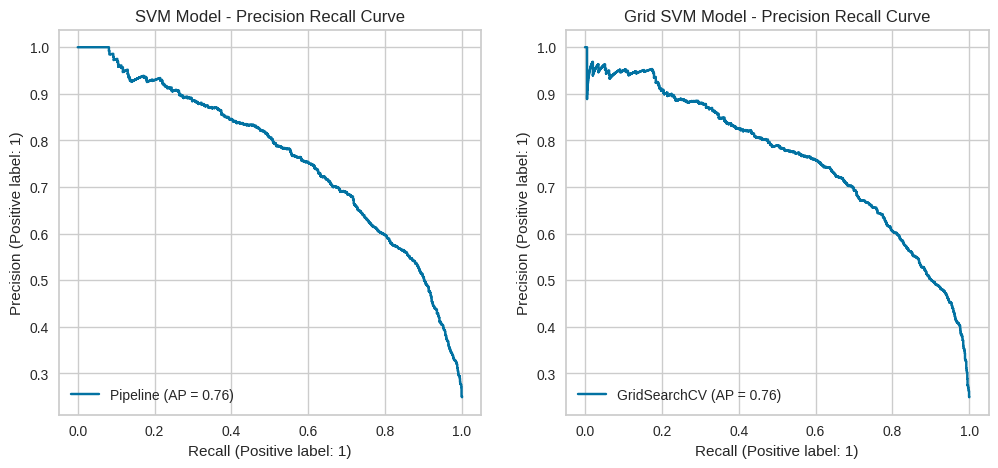

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

svm_prCurve.plot(ax=ax[0])
ax[0].set_title("SVM Model - Precision Recall Curve")
svm_grid_prCurve.plot(ax=ax[1])
ax[1].set_title("Grid SVM Model - Precision Recall Curve")

In [ ]:
knn_model = Pipeline([("scaler", MinMaxScaler()),("knn", KNeighborsClassifier())])

knn_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])

In [ ]:
# Prediction
y_pred = knn_model.predict(X_test)
y_pred_proba = knn_model.predict_proba(X_test)

# Scores to compare the models at the end.
knn_f1 = f1_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_auc = roc_auc_score(y_test, y_pred)

In [ ]:
eval_metric(knn_model, X_train, y_train, X_test, y_test, 'knn_model')

knn_model Test_Set
[[4107  460]
 [ 603  912]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      4567
           1       0.66      0.60      0.63      1515

    accuracy                           0.83      6082
   macro avg       0.77      0.75      0.76      6082
weighted avg       0.82      0.83      0.82      6082


knn_model Train_Set
[[17073  1193]
 [ 1840  4222]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92     18266
           1       0.78      0.70      0.74      6062

    accuracy                           0.88     24328
   macro avg       0.84      0.82      0.83     24328
weighted avg       0.87      0.88      0.87     24328



knn_model ROC_AUC Score: 0.849169353107853
--------------------------------------------------


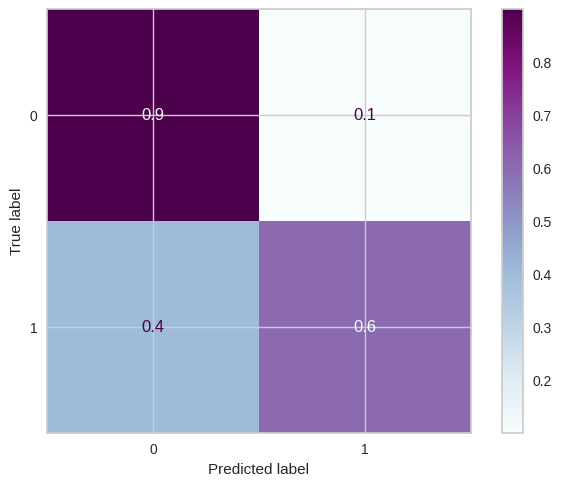

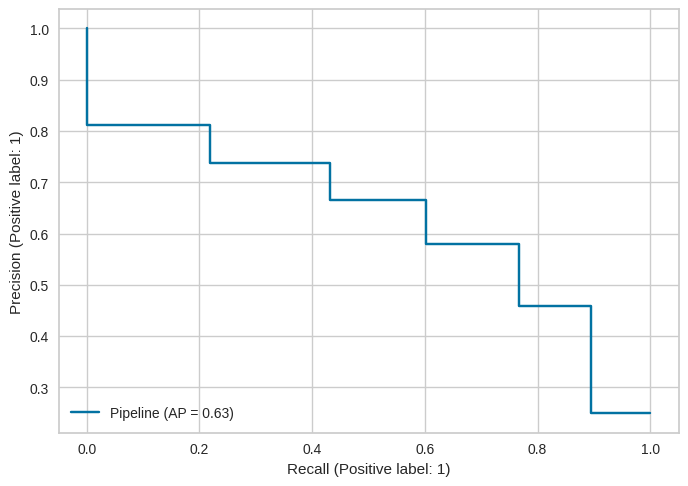

In [ ]:
# Roc_AUC_score
print('knn_model ROC_AUC Score:', roc_auc_score(y_test, y_pred_proba[:,1]))
print('--------------------------------------------------')

# Confusion Matrix
knn_matrix = ConfusionMatrixDisplay.from_estimator(knn_model, X_test,y_test, normalize='true', cmap='BuPu' )

# Precision-Recall Curve
knn_prCurve = PrecisionRecallDisplay.from_estimator(knn_model, X_test, y_test)

In [ ]:
test_error_rates = []

for k in range(1,10):

    knn_model = Pipeline([("scaler", MinMaxScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))])

    scores = cross_validate(knn_model, X_train, y_train, scoring = ['recall'], cv = 10)

    recall_mean = scores["test_recall"].mean()

    test_error = 1 - recall_mean

    test_error_rates.append(test_error)


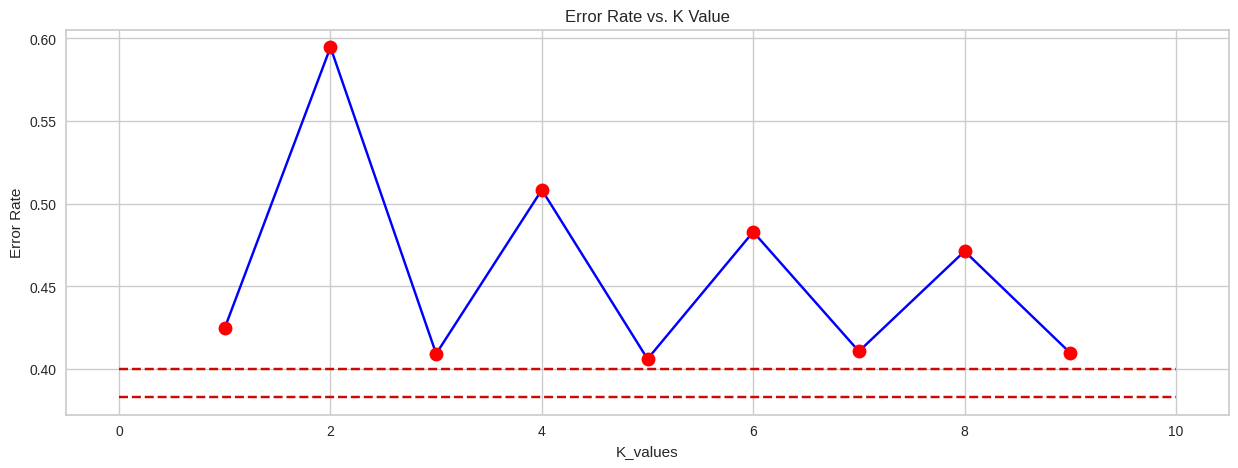

In [ ]:
# Error Rate vs. K Value

plt.figure(figsize=(15,5))
plt.plot(range(1,10), test_error_rates, color='blue', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.4, xmin = 0, xmax = 10, colors= 'r', linestyles="--")
plt.hlines(y=0.383, xmin = 0, xmax = 10, colors= 'r', linestyles="--")

In [ ]:
test_error_rates = []
train_error_rates = []

for k in range(1,10):

    knn_model = Pipeline([("scaler", MinMaxScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))])

    knn_model.fit(X_train,y_train)

    scores = cross_validate(knn_model, X_train, y_train, scoring = ['recall'], cv = 10, return_train_score=True)

    recall_test_mean = scores["test_recall"].mean()
    recall_train_mean = scores["train_recall"].mean()


    test_error = 1 - recall_test_mean
    train_error = 1 - recall_train_mean
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

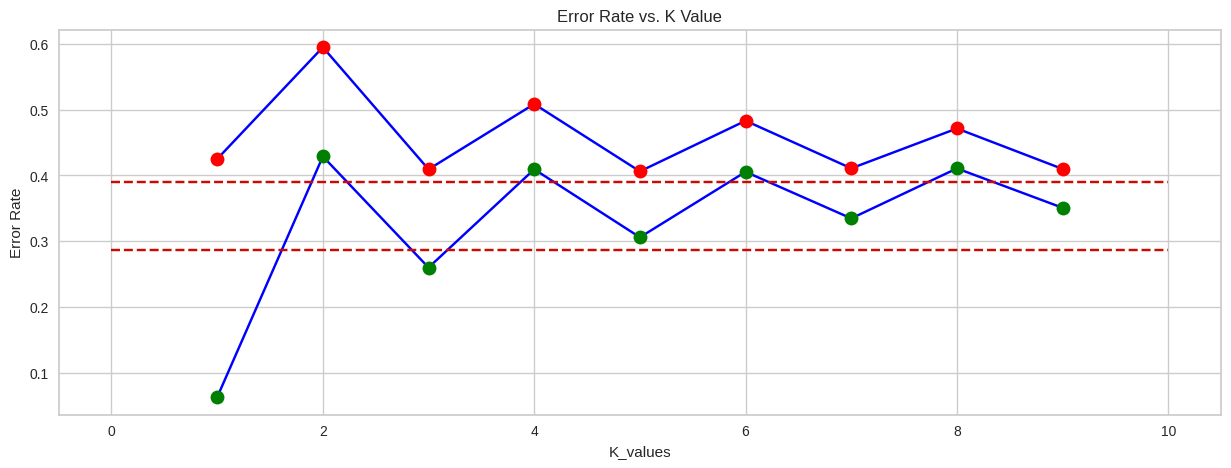

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(range(1,10), test_error_rates, color='blue', marker='o',
         markerfacecolor='red', markersize=10)

plt.plot(range(1,10), train_error_rates, color='blue', marker='o',
         markerfacecolor='green', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.39, xmin = 0, xmax = 10, colors= 'r', linestyles="--")
plt.hlines(y=0.286, xmin = 0, xmax = 10, colors= 'r', linestyles="--")

# Red color: Test data erorr rates
# Green color: Train data error rates

In [ ]:
k_list = [3,5,7,15]

for i in k_list:

    knn = Pipeline([("scaler", MinMaxScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))])
    knn.fit(X_train, y_train)

    print(f'WITH K={i}\n')

    eval_metric(knn, X_train, y_train, X_test, y_test,'knn_model')

WITH K=3

knn_model Test_Set
[[4143  424]
 [ 604  911]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4567
           1       0.68      0.60      0.64      1515

    accuracy                           0.83      6082
   macro avg       0.78      0.75      0.76      6082
weighted avg       0.83      0.83      0.83      6082


knn_model Train_Set
[[16987  1279]
 [ 2123  3939]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     18266
           1       0.75      0.65      0.70      6062

    accuracy                           0.86     24328
   macro avg       0.82      0.79      0.80     24328
weighted avg       0.86      0.86      0.86     24328

WITH K=5

knn_model Test_Set
[[4143  424]
 [ 604  911]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4567
           1       0.68      0.60      0.64      1515

    accuracy      

In [ ]:
#Cross Validation, k=7;
model = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=7))])

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.831922
train_accuracy     0.867300
test_precision     0.683488
train_precision    0.763458
test_recall        0.606232
train_recall       0.677298
test_f1            0.642414
train_f1           0.717796
dtype: float64

In [ ]:
knn_model.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=9))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'knn': KNeighborsClassifier(n_neighbors=9),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 9,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [ ]:
# Hyperparameters Tuning with GridSearchSV

model = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier())])


k_values = range(1,10)

param_grid = {
        "knn__n_neighbors": k_values,
        "knn__metric": ['minkowski'],
        "knn__p": [1, 2],
        "knn__weights": ['uniform', 'distance']
        }


knn_grid_model = GridSearchCV(model,
                              param_grid,
                              scoring='recall',
                              cv=5,
                              n_jobs= -1,
                              verbose=1,
                              return_train_score=True).fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [ ]:
print('Best Params:', knn_grid_model.best_params_)
print('Best Recall Score(test):', knn_grid_model.best_score_)
print('Best Score index:', knn_grid_model.best_index_)

Best Params: {'knn__metric': 'minkowski', 'knn__n_neighbors': 9, 'knn__p': 2, 'knn__weights': 'uniform'}
Best Recall Score(test): 0.6035959449201309
Best Score index: 34


In [ ]:
# Checking overfiting with the CV scores

pd.DataFrame(knn_grid_model.cv_results_).loc[10, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.602605
mean_train_score     0.75033
Name: 10, dtype: object

In [ ]:
# Prediction
y_pred = knn_grid_model.predict(X_test)
y_pred_proba = knn_grid_model.predict_proba(X_test)

# Scores to compare the models at the end.
knn_grid_f1 = f1_score(y_test, y_pred)
knn_grid_recall = recall_score(y_test, y_pred)
knn_grid_auc = roc_auc_score(y_test, y_pred)

In [ ]:
# Checking the Incorrect Predictions

# Test Data df
test_data = pd.concat([X_test, y_test], axis=1)

# Create new column for 'predicted' classes to compore with actual target classes
test_data["pred"] = y_pred

# Filtering the wrong predicted obs
wrong_pred = test_data[((test_data["income"] == 0) & (test_data["pred"] == 1)) |
             ((test_data["income"] == 1) & (test_data["pred"] == 0))]

print('knn_grid_model Total Incorrect Predictions:', wrong_pred.shape)


print('------------------------------------------------')

# Actual-Predicted-Probalility of Pozitive Class(1)
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1]}
pd.DataFrame.from_dict(my_dict).sample(10)

knn_grid_model Total Incorrect Predictions: (1002, 49)
------------------------------------------------


Actual  Pred   Proba_1
3819        0     0  0.222222
10171       0     0  0.000000
15473       0     0  0.000000
13406       1     1  0.777778
24419       0     0  0.000000
30181       0     0  0.000000
13251       1     1  0.666667
29845       0     1  0.888889
20132       0     0  0.000000
23954       0     0  0.222222

In [ ]:
# Evaluating the Model Performance using Classification Metrics

print('WITH K=7\n')
eval_metric(knn_grid_model, X_train, y_train, X_test, y_test,'knn_model')

WITH K=7

knn_model Test_Set
[[4143  424]
 [ 578  937]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      4567
           1       0.69      0.62      0.65      1515

    accuracy                           0.84      6082
   macro avg       0.78      0.76      0.77      6082
weighted avg       0.83      0.84      0.83      6082


knn_model Train_Set
[[16967  1299]
 [ 2037  4025]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     18266
           1       0.76      0.66      0.71      6062

    accuracy                           0.86     24328
   macro avg       0.82      0.80      0.81     24328
weighted avg       0.86      0.86      0.86     24328



knn_grid_model ROC_AUC Score: 0.8729705355032986
--------------------------------------------------


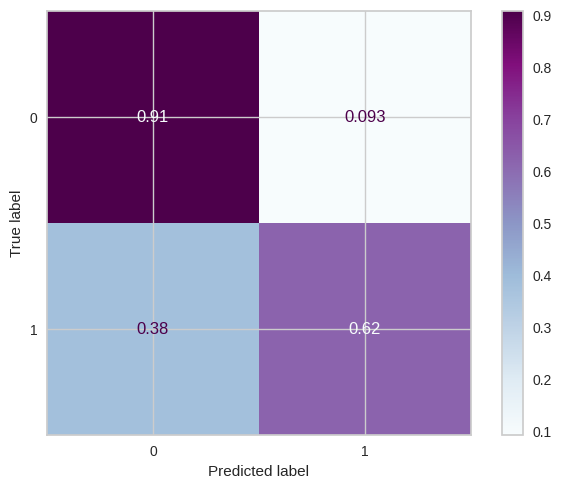

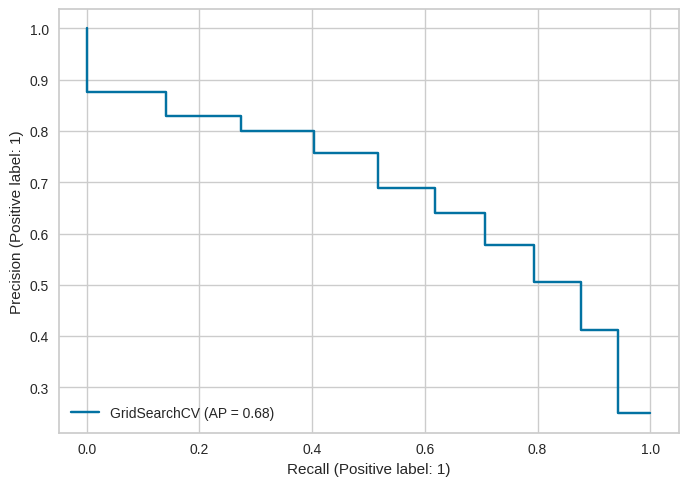

In [ ]:
# Roc_AUC_score
print('knn_grid_model ROC_AUC Score:', roc_auc_score(y_test, y_pred_proba[:,1]))
print('--------------------------------------------------')

# Confusion Matrix
knn_grid_matrix = ConfusionMatrixDisplay.from_estimator(knn_grid_model, X_test,y_test, normalize='true', cmap='BuPu' )

# Precision-Recall Curve
knn_grid_prCurve = PrecisionRecallDisplay.from_estimator(knn_grid_model, X_test, y_test)

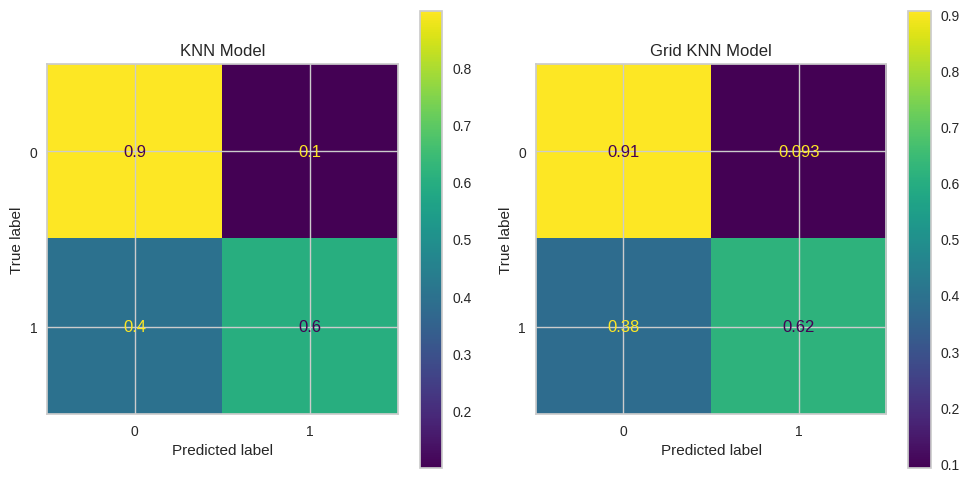

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

knn_matrix.plot(ax=ax[0])
ax[0].set_title("KNN Model")
knn_grid_matrix.plot(ax=ax[1])
ax[1].set_title("Grid KNN Model")

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'KNN Grid Model - Precision Recall Curve')

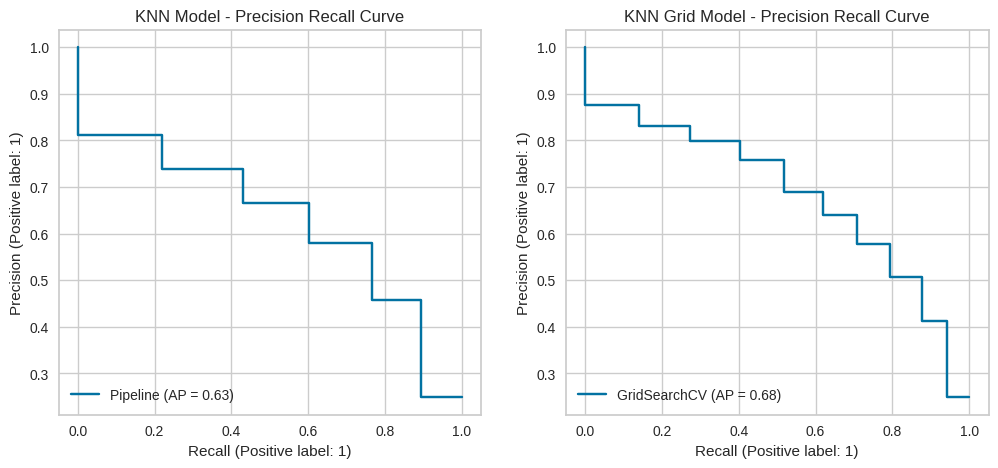

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

knn_prCurve.plot(ax=ax[0])
ax[0].set_title("KNN Model - Precision Recall Curve")
knn_grid_prCurve.plot(ax=ax[1])
ax[1].set_title("KNN Grid Model - Precision Recall Curve")

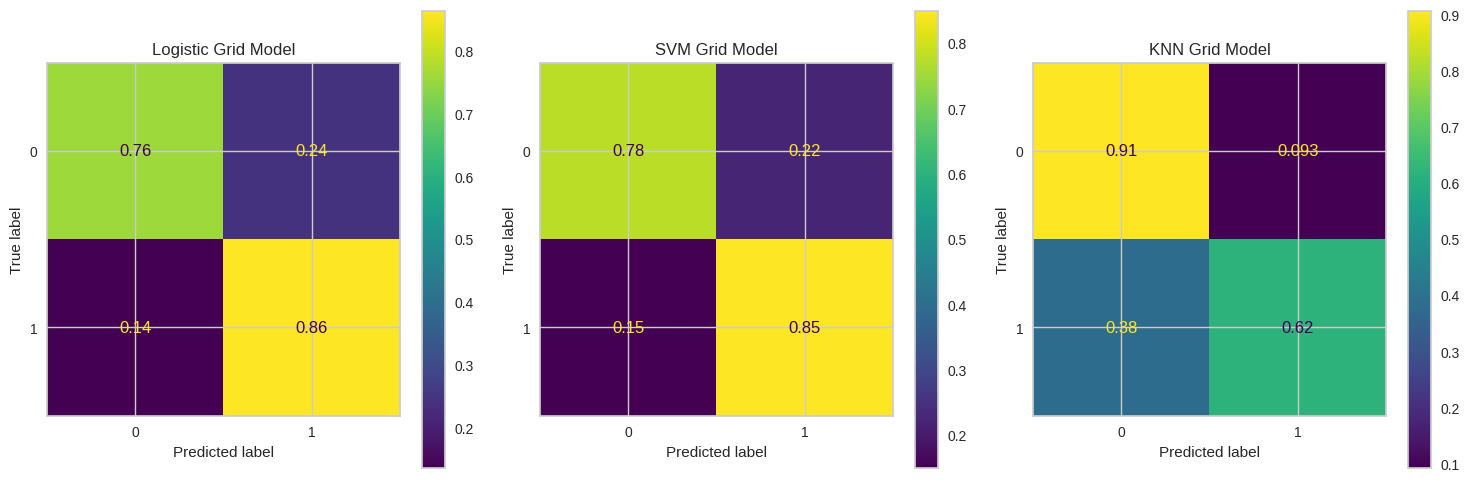

In [ ]:
# Confusion Matrix
fig, ax = plt.subplots(1, 3, figsize=(15,5))

grid_log_matrix.plot(ax=ax[0])
ax[0].set_title("Logistic Grid Model")
svm_grid_matrix.plot(ax=ax[1])
ax[1].set_title("SVM Grid Model")
knn_grid_matrix.plot(ax=ax[2])
ax[2].set_title("KNN Grid Model")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'KNN Grid -Precision Recall Curve')

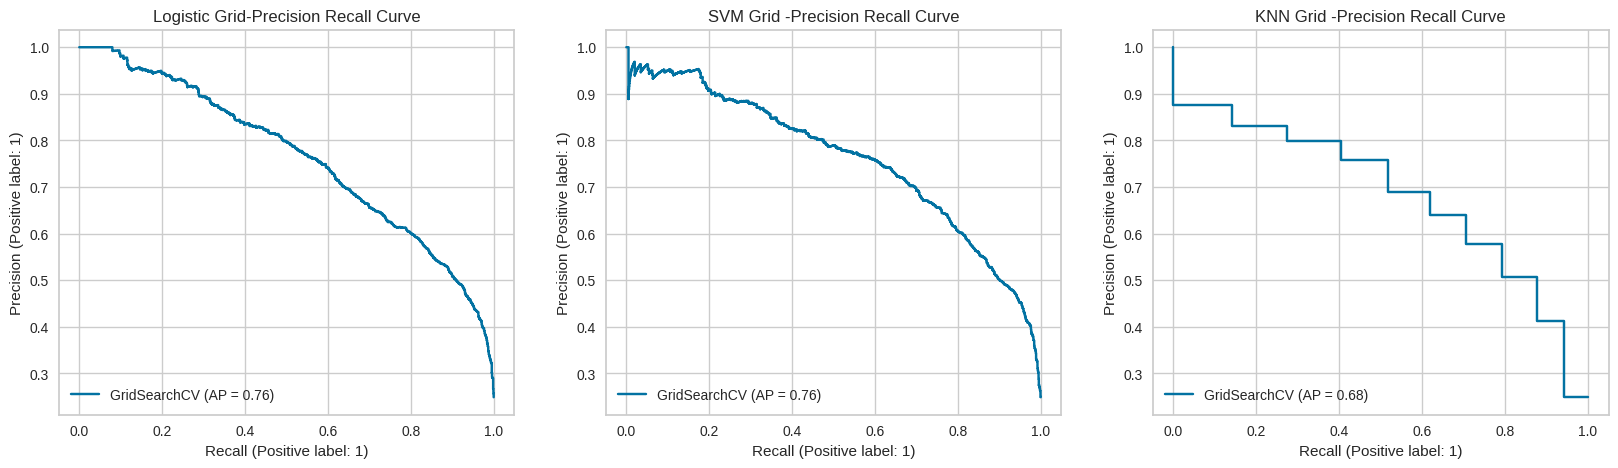

In [ ]:
# Precision-Recall Curves

fig, ax = plt.subplots(1, 3, figsize=(20, 5))

grid_log_prCurve.plot(ax=ax[0])
ax[0].set_title("Logistic Grid-Precision Recall Curve")
svm_grid_prCurve.plot(ax=ax[1])
ax[1].set_title("SVM Grid -Precision Recall Curve")
knn_grid_prCurve.plot(ax=ax[2])
ax[2].set_title("KNN Grid -Precision Recall Curve")

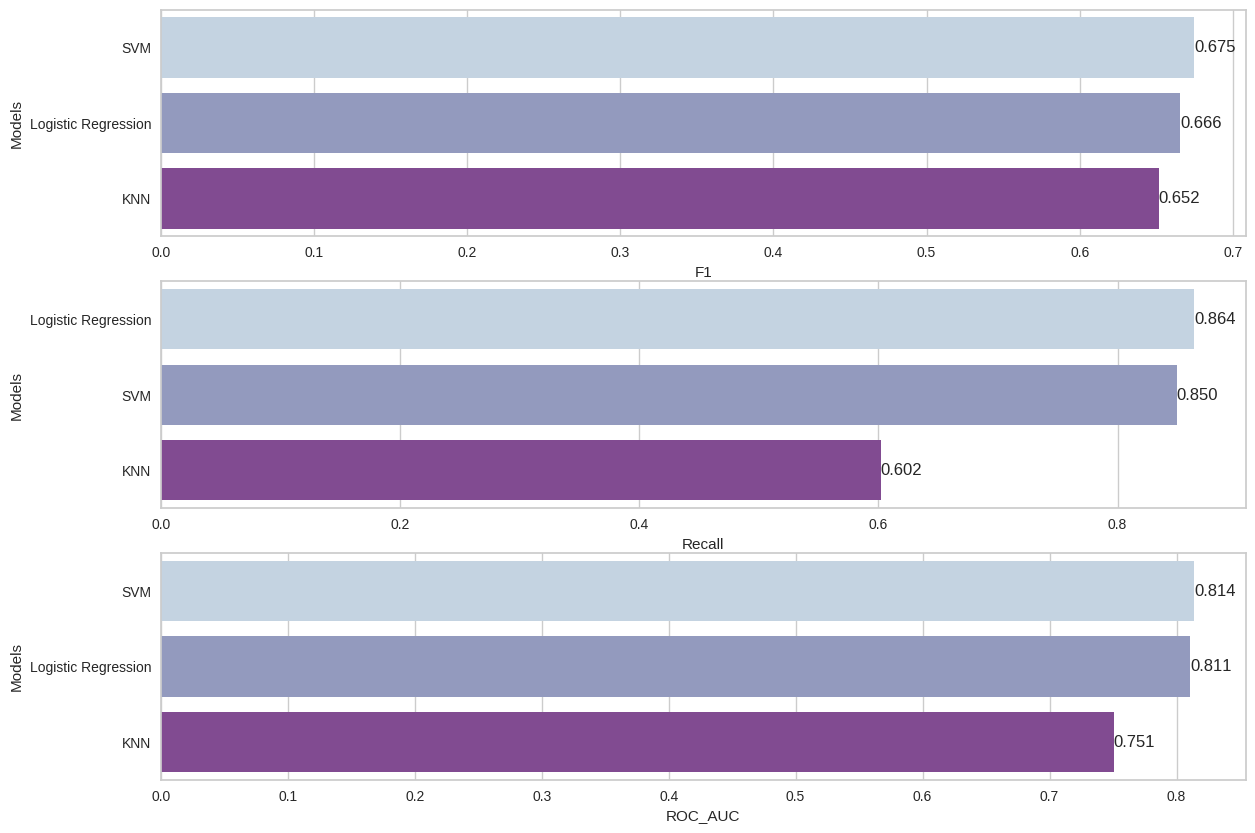

In [ ]:
# F1 - Recall - ROC_AUC Scores

compare = pd.DataFrame({"Models": ["Logistic Regression","SVM", "KNN"],
                        "F1": [log_grid_f1,svm_grid_f1, knn_grid_f1],
                        "Recall": [log_grid_recall, svm_grid_recall, knn_recall],
                        "ROC_AUC": [log_grid_auc,svm_grid_auc, knn_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment


plt.figure(figsize=(14,10))

plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Models", data=compare, palette="BuPu")
labels(ax)
plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Models", data=compare, palette="BuPu")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Models", data=compare, palette="BuPu")
labels(ax)

plt.show()

In [ ]:
# SVM Model with the Best Parameters

model = Pipeline([("scaler", MinMaxScaler()), ("SVC", SVC(class_weight="balanced"))])


param_grid = {"SVC__C":[1],
             "SVC__gamma":["scale"],
             "SVC__kernel":["rbf"]}

cv = StratifiedKFold(n_splits = 5) # for unbalanced data

final_svm_model = GridSearchCV(model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = "recall_macro",
                          n_jobs = -1, # Uses all available cores
                          verbose=1,
                          return_train_score=True).fit(X_train, y_train) # fit the model

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [ ]:
# Export the final model to your local -> serilarization

import pickle
pickle.dump(final_svm_model, open("final_classification_model", "wb"))

In [ ]:
# Import the final model to use -> deserilization

new_model = pickle.load(open("final_classification_model", "rb"))
new_model

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('SVC', SVC(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'SVC__C': [1], 'SVC__gamma': ['scale'],
                         'SVC__kernel': ['rbf']},
             return_train_score=True, scoring='recall_macro', verbose=1)